In [1]:
import pandas as pd
import numpy as np
import scipy
import pysr
import sympy
import math
from pysr import PySRRegressor
import matplotlib.pyplot as plt
import pickle

[juliapkg] Found dependencies: /home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/juliapkg/juliapkg.json
[juliapkg] Found dependencies: /home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/juliapkg.json
[juliapkg] Found dependencies: /home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/juliacall/juliapkg.json
[juliapkg] Locating Julia =1.10.0, ^1.10.3
[juliapkg] Querying Julia versions from https://julialang-s3.julialang.org/bin/versions.json
[juliapkg] WARNING: About to install Julia 1.11.5 to /home/ajt6830/.local/share/mamba/envs/pysr_env/julia_env/pyjuliapkg/install.
[juliapkg]   If you use juliapkg in more than one environment, you are likely to
[juliapkg]   have Julia installed in multiple locations. It is recommended to
[juliapkg]   install JuliaUp (https://github.com/JuliaLang/juliaup) or Julia
[juliapkg]   (https://julialang.org/downloads) yourself.
[juliapkg] Downloading Julia from https://julialang-s3

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.local/share/mamba/envs/pysr_env/julia_env/Project.toml`
  [6099a3de] + PythonCall v0.9.25
⌅ [8254be44] + SymbolicRegression v1.11.3
  [458c3c95] + OpenSSL_jll v3.5.1+0
  [9e88b42a] ~ Serialization ⇒ v1.11.0
    Updating `~/.local/share/mamba/envs/pysr_env/julia_env/Manifest.toml`
  [47edcb42] + ADTypes v1.15.0
  [79e6a3ab] + Adapt v4.3.0
  [66dad0bd] + AliasTables v1.1.3
  [4fba245c] + ArrayInterface v7.19.0
  [d360d2e6] + ChainRulesCore v1.25.2
  [bbf7d656] + CommonSubexpressions v0.3.1
  [34da2185] + Compat v4.17.0
  [992eb4ea] + CondaPkg v0.2.29
  [187b0558] + ConstructionBase v1.6.0
  [9a962f9c] + DataAPI v1.16.0
  [864edb3b] + DataStructures v0.18.22
  [e2d170a0] + DataValueInterfaces v1.0.0
  [163ba53b] + DiffResults v1.1.0
  [b552c78f] + DiffRules v1.15.1
  [a0c0ee7d] + DifferentiationInterface v0.7.1
  [8d63f2c5] + DispatchDoctor v0.4.22
  [ffbed154] + DocStringExtensio

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
pip install sxs

  Using cached sxs-2025.0.17-py3-none-any.whl.metadata (13 kB)
  Using cached bibtexparser-2.0.0b8-py3-none-any.whl.metadata (5.4 kB)
  Using cached h5py-3.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.7 kB)
  Using cached inflection-0.5.1-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached quaternionic-1.0.15-py3-none-any.whl.metadata (18 kB)
  Using cached spherical-1.0.16-py3-none-any.whl.metadata (7.7 kB)
  Using cached sxscatalog-3.0.15-py3-none-any.whl.metadata (1.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached pylatexenc-2.10-py3-none-any.whl
  Using cached spinsfast-2022.4.10-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (520 bytes)
Using cached sxs-2025.0.17-py3-none-any.whl (224 kB)
Using cached bibtexparser-2.0.0b8-py3-none-any.whl (39 kB)
Using cached h5py-3.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.5 MB)
Using cached inflection-0.5.1-py2.py3-none-any.whl (9.5 kB

In [3]:
import sxs
print(sxs.__file__)
print(sxs.__version__)
print(dir(sxs))

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/sxs/__init__.py
2025.0.17
['Catalog', 'HorizonQuantities', 'Horizons', 'Metadata', 'Simulation', 'Simulations', 'TimeSeries', 'WaveformModes', 'WaveformModesDict', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'astronomical_unit', 'catalog', 'citation', 'cite', 'doi_prefix', 'doi_url', 'file_format', 'guvectorize', 'handlers', 'horizons', 'importlib_metadata', 'jit', 'lev_number', 'load', 'load_lvc', 'load_via_sxs_id', 'loadcontext', 'local_simulations', 'm_sun_in_meters', 'm_sun_in_seconds', 'metadata', 'parsec_in_meters', 'read_config', 'rpdmb', 'rpxmb', 'simulations', 'solar_mass_parameter', 'spectre_cce_v1', 'speed_of_light', 'sxs_directory', 'sxs_id', 'sxs_id_to_url', 'time_series', 'to_lvc_conventions', 'utilities', 'vectorize', 'version_info', 'waveforms', 'write_config', 'write_local_simulations', 'zenodo']


In [4]:
df = sxs.load("dataframe")

Loading SXS simulations using latest tag 'v3.0.0', published at 2025-05-14T18:17:30Z.


In [5]:
df_1 = df.loc[df['reference_eccentricity'] < 0.01]
df_2 = df_1.loc[df_1["reference_dimensionless_spin1_x"] < 0.001]
df_3 = df_2.loc[df_2["reference_dimensionless_spin2_x"] < 0.001]
df_4 = df_3.loc[df_3["reference_dimensionless_spin1_y"] < 0.001]
df_5 = df_4.loc[df_4["reference_dimensionless_spin2_y"] < 0.001]
df_6 = df_5.loc[df_5["deprecated"] == False]
df_7 = df_6.loc[np.isfinite(df_6["common_horizon_time"])]

print(len(df_7))

848


In [6]:
ref_orb_period = 2*np.pi/df_7["reference_orbital_frequency_mag"]
CHT = df_7["common_horizon_time"] - df_7["reference_time"]

In [7]:
def Newtonian_CHT(X):
    #tau is orbital period, q is mass_ratio, A is scaling constant based on fundamental mathematical and physical constants with G = C = 1
    A = 5/(16*np.pi)**(8/3)
    tau, q = X
    return A*tau**(8/3)*(q+1)**2/q

def nu(q):
    return q/(q+1)**2

In [9]:
init_param = np.column_stack((ref_orb_period, df_7["reference_mass_ratio"]))

with open("best_model_0.446.pk", 'rb') as file: #Open the saved model file and store that data under the name 'file'
    loaded_model = pickle.load(file) #Use Pickle module to load data into usable format and put that into loaded_model variable

direct_corrections = loaded_model.predict(init_param)
corrected_CHT = Newtonian_CHT([ref_orb_period, df_7["reference_mass_ratio"]]) - direct_corrections #Subtracts "post-Newtonian" corrects from the Newtonian predictions for CHT

CHT_residual = corrected_CHT - CHT #Defines whatever residual is left over (mostly due to spin) after post-Newtonian corrections are applied to the Newtonian model

In [10]:
default_pysr_params = dict(
    populations = 30,
    model_selection="best",
)

best_avg_error = 100

In [11]:
model = PySRRegressor(
    niterations=30,
    binary_operators=["+", "*", "-"],
    unary_operators=["square", "cube", "sqrt", "cbrt", "inv(x) = 1/x"], #"cube_root(x) = cbrt(x)"
    extra_sympy_mappings={"inv": lambda x: 1/x}, #"square": lambda x: x**2, "cube_root": lambda x: x**(1/3)
    **default_pysr_params,
    elementwise_loss="loss(prediction, target, w) = ((prediction - target)/w)^2"
    # ^ Custom loss function (julia syntax). It takes the difference of the PN residual from the PySR estimation and weights it by the inverse
    #of the length of the original simulation
)

In [13]:

#Here, we fit to the residuals between the corrected Newtonian predictions for common horizon time and the common horizon times found by simulation. 
#This model uses regular mass ratio as a parameter, and all plots are made with mass ratio q

num = 100
init_param = np.column_stack((ref_orb_period, df_7["reference_mass_ratio"], df_7["reference_dimensionless_spin1_z"], df_7["reference_dimensionless_spin2_z"])) #loading data to train on including spin

for i in range(num):
    model.fit(init_param, CHT_residual, weights = CHT) #Fits the orbital period, mass ratio, and spin data to the residuals found between the simulation CHT and the CHT predicted by my corrected Newtonian model
    Residual_pred = model.predict(init_param) #Uses fitted model to predict residuals between PN model and actual CHT
    current_avg_error = 100*np.sqrt(np.power((CHT_residual - Residual_pred)/CHT, 2)).mean() #Defines leftover error after removing the model's prediction for residual from PN model
    
    print("Current Prediction Average Error (%):", current_avg_error)
    print("Best Prediction Average Error (%):", best_avg_error)
    print("Current Model Formula:", model.sympy())
    plt.scatter(df_7["reference_mass_ratio"], 100*(CHT_residual - Residual_pred)/CHT, marker = ".", label = "PySR") #Plots leftover error
    plt.xlabel("q")
    plt.ylabel("Error in CHT (%)")
    plt.title("Percent Residuals")

    if current_avg_error < best_avg_error:
        best_avg_error = current_avg_error
        plt.savefig(f"spin_model_{round(best_avg_error, 3)}.png")
        with open(f'spin_model_{round(best_avg_error, 3)}.pk', 'wb') as best_model_file: #We create a pickle file called 'best_model.pk' that we want to write into and call it best_model_file
            pickle.dump(model, best_model_file) #We write the current state of the model to the pickle file created above
    elif current_avg_error < 1.5*best_avg_error:
        plt.savefig(f"spin_model_{round(current_avg_error, 3)}.png")
        with open(f'spin_model_{round(current_avg_error, 3)}.pk', 'wb') as good_model_file:
            pickle.dump(model, good_model_file)

    plt.close()

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_

───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.91
3           1.342e-06  5.083e-01  y = x₂ * -1148
5           8.434e-07  2.321e-01  y = x₁ * (x₂ * -287.08)
7           5.430e-07  2.201e-01  y = (x₁ - x₀) * (x₂ * x₁)
8           5.246e-07  3.454e-02  y = ((x₀ * sqrt(x₁)) * -2.0731) * x₂
9           2.098e-07  9.166e-01  y = (((x₂ * -0.96163) * x₁) - x₃) * x₀
10          8.116e-08  9.496e-01  y = ((x₁ * x₂) + x₃) * (square(x₀) * -0.003009)
12          5.469e-08  1.973e-01  y = (x₃ + (x₂ * (x₁ - -0.47765))) * (square(x₀) * -0.00271...
                                      31)
───────────────────────────────────────────────────────────────────────────────────────────────────
Current Prediction Average Error (%): 1.6436584253723603
Best Prediction Average Error (%): 1.2965759200138105
Current Model Formula: (x1*x2 + x3)*x0**2*(-0.0030089743)
  - outputs/

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 1.3613115474503337
Best Prediction Average Error (%): 1.2965759200138105
Current Model Formula: (x2*(-x1 - 0.48323727) - x3)*0.0027114647*x0**2
  - outputs/20250703_163407_Yd5gF7/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.16
3           1.275e-06  5.336e-01  y = x₂ * -988.21
5           8.537e-07  2.007e-01  y = x₁ * (x₂ * -303.93)
7           5.202e-07  2.477e-01  y = (x₀ * (-0.35345 - x₁)) * x₂
9           1.999e-07  4.782e-01  y = (x₁ - x₀) * (x₃ + (x₂ * x₁))
11          1.057e-07  3.185e-01  y = (65.953 - x₀) * (((x₂ * x₁) + x₃) + x₂)
13          9.841e-08  3.586e-02  y = (65.953 - x₀) * ((x₃ + (x₂ + (x₂ * x₁))) - 0.099265)
15          9.753e-08  4.464e-03  y = ((65.953 - x₀) * (((x₂ * x₁) + x₂) + (x₃ - 0.099265)))...
                                       - x₁
17          6.228e-08  2.243e-01  y = 1.1799 * (15.645 - (((x₃ * 1.2071) + ((x₁ * x₂) + x₂))...
                                       * (x₀ - 105.37)))
19          6.196e-08  2.594e-03  y = 15.645 - (((x₃ * 1.2071) + ((x₁ * x₂) + x₂)) * (((x₀ -...
            

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163418_OYAOBh/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.79
3           1.275e-06  5.336e-01  y = x₂ * -981.97
5           8.434e-07  2.068e-01  y = x₁ * (x₂ * -287.14)
7           5.202e-07  2.416e-01  y = x₂ * ((-0.35334 - x₁) * x₀)
9           1.999e-07  4.782e-01  y = (x₃ + (x₂ * x₁)) * (x₁ - x₀)
11          9.899e-08  3.514e-01  y = x₀ * ((((x₂ * -0.0030013) * x₁) * x₀) - x₃)
13          8.039e-08  1.040e-01  y = ((x₀ * (((x₁ * -0.94617) * x₂) - x₃)) * 0.0031603) * x...
                                      ₀
15          5.031e-08  2.344e-01  y = ((((x₂ * -0.86113) * (x₁ + 0.60724)) - x₃) * (x₀ * 0.0...
                                      030219)) * x₀
16          5.016e-08  3.050e-03  y = (x₀ * (((x₁ + square(0.72573)) * (x₂ * -0.86138)) - x₃...
                                      )) * (0.0030523 * x₀)
17          4.812e-08  4.152e-02  y = x₀ * (((x₀

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 1.3771608105866906
Best Prediction Average Error (%): 1.1328905406884227
Current Model Formula: x0*(x2*(x1 - 1*(-0.44588846)) - (-0.9715217)*x3)*x0*(-0.0027433431)
  - outputs/20250703_163429_JG4QT7/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.82
3           1.277e-06  5.331e-01  y = x₂ * -965.56
5           8.434e-07  2.073e-01  y = (x₂ * x₁) * -287.12
7           5.202e-07  2.416e-01  y = (-0.35356 - x₁) * (x₀ * x₂)
9           1.999e-07  4.782e-01  y = (x₁ - x₀) * ((x₂ * x₁) + x₃)
11          1.393e-07  1.807e-01  y = (((-0.56377 - (0.86104 * x₁)) * x₂) - x₃) * x₀
13          1.238e-07  5.893e-02  y = (x₀ - x₁) * ((((-1.0141 - x₁) * x₂) * 0.79755) - x₃)
14          1.123e-07  9.726e-02  y = (x₀ - 34.562) * ((0.032205 - ((inv(x₁) + x₁) * x₂)) - ...
                                      x₃)
16

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163434_3amYZr/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.61
3           1.275e-06  5.336e-01  y = x₂ * -984.29
5           8.434e-07  2.068e-01  y = x₂ * (x₁ * -287.09)
7           5.430e-07  2.201e-01  y = ((x₁ - x₀) * x₁) * x₂
9           1.999e-07  4.996e-01  y = (x₁ - x₀) * ((x₁ * x₂) + x₃)
11          1.229e-07  2.431e-01  y = (x₃ + (x₂ * (x₁ - -0.59871))) * (42.756 - x₀)
13          1.064e-07  7.230e-02  y = (x₃ + (x₂ * (x₁ - -0.96465))) * (42.756 - (x₀ + -20.64...
                                      4))
14          1.055e-07  7.906e-03  y = (-1.1174 - (x₁ + (x₃ * inv(x₂)))) * ((x₀ - 74.942) * x...
                                      ₂)
15          9.641e-08  9.052e-02  y = ((x₂ * x₁) * (89.615 - x₀)) - (x₀ * (x₂ - (x₃ * -1.139...
                                      9)))
16          7.999e-08  1.8

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163439_9QF9U2/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116
3           1.275e-06  5.336e-01  y = x₂ * -990.05
5           8.434e-07  2.068e-01  y = (x₂ * x₁) * -287.12
7           5.202e-07  2.416e-01  y = ((-0.35345 - x₁) * x₂) * x₀
9           2.015e-07  4.743e-01  y = x₀ * (((-0.2233 - x₁) * x₂) - x₃)
11          1.263e-07  2.334e-01  y = x₀ * (((0.76193 * (-1.1239 - x₁)) * x₂) - x₃)
12          1.128e-07  1.133e-01  y = square(x₀) * (((0.040719 - x₃) - (x₂ * x₁)) * 0.002712...
                                      )
14          5.330e-08  3.748e-01  y = (((0.040719 - x₃) - ((x₁ - -0.48022) * x₂)) * 0.002712...
                                      ) * square(x₀)
16          4.998e-08  3.216e-02  y = (((0.040719 - (1.105 * x₃)) - ((x₁ - -0.48022) * x₂)) ...
                                      * 0.002712) *

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 1.3680089063185783
Best Prediction Average Error (%): 1.1328905406884227
Current Model Formula: (-x2*(x1 - 1*(-0.48022234)) - x3 + 0.040718578)*0.0027119939*x0**2
  - outputs/20250703_163444_z4dB2J/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.94
3           3.444e-06  3.694e-02  y = x₂ * -80.957
4           1.714e-06  6.976e-01  y = cube(x₂ * -11.575)
5           8.434e-07  7.093e-01  y = (x₁ * -287.08) * x₂
7           5.202e-07  2.416e-01  y = x₀ * ((-0.35358 - x₁) * x₂)
9           1.999e-07  4.782e-01  y = (x₁ - x₀) * ((x₂ * x₁) + x₃)
11          1.773e-07  5.995e-02  y = (10.047 - x₀) * (x₃ + ((x₁ + 0.36951) * x₂))
12          1.668e-07  6.129e-02  y = (sqrt(x₀) - x₀) * (x₃ + (x₂ * (x₁ + 0.40262)))
13          9.959e-08  5.156e-01  y = ((x₂ * (x₁ + 0.77841)) + (x₃ * 1.2639)) * (49.597 - x₀...
                                      )
15          8.604e-08  7.313e-02  y = ((x₃ * 1.3791) + (x₂ * (x₁ + 0.91536))) * (64.22 - (x₀...
                                       + 0.438))
22          8.253e-08  5.948e-03  y = ((((square(x₃) + 76.999) +

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163454_xKGn67/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.78
3           1.275e-06  5.336e-01  y = x₂ * -988.5
5           8.434e-07  2.068e-01  y = (x₁ * -287.09) * x₂
7           5.202e-07  2.416e-01  y = x₂ * ((-0.35353 - x₁) * x₀)
9           1.999e-07  4.782e-01  y = (x₃ + (x₁ * x₂)) * (x₁ - x₀)
11          1.807e-07  5.050e-02  y = (sqrt(cube(x₁)) - x₀) * (x₃ + (x₂ * x₁))
13          1.703e-07  2.964e-02  y = (x₁ + (x₁ - x₀)) * ((x₂ * (x₁ - -0.12704)) + x₃)
14          1.081e-07  4.548e-01  y = ((((x₃ * inv(x₂)) + x₁) - -0.96581) * (72.128 - x₀)) *...
                                       x₂
16          1.048e-07  1.555e-02  y = (x₂ * ((72.128 - x₀) * (x₁ + ((x₃ * inv(x₂)) + 1.0916)...
                                      ))) - -0.96581
17          1.041e-07  6.210e-03  y = (((((inv(x₂) * x₃) + x₁) + 0

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163459_VZ3bEo/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.06
3           1.344e-06  5.076e-01  y = x₂ * -827.98
5           8.434e-07  2.328e-01  y = (x₂ * -286.92) * x₁
7           5.430e-07  2.201e-01  y = (x₁ * x₂) * (x₁ - x₀)
9           1.999e-07  4.996e-01  y = (x₁ - x₀) * ((x₂ * x₁) + x₃)
11          1.807e-07  5.050e-02  y = (cube(sqrt(x₁)) - x₀) * ((x₁ * x₂) + x₃)
12          1.676e-07  7.557e-02  y = (((x₁ + 0.34809) * x₂) + x₃) * (sqrt(x₀) - x₀)
13          1.259e-07  2.856e-01  y = x₀ * ((-0.76688 * (x₂ + (x₂ * x₁))) - (1.0614 * x₃))
14          1.217e-07  3.397e-02  y = (x₂ * ((25.461 - x₀) * (x₁ + inv(x₁)))) - (x₀ * x₃)
15          6.552e-08  6.194e-01  y = ((x₁ + 0.55903) * (x₀ * (-0.0025638 * (x₀ * x₂)))) - (...
                                      x₃ * x₀)
16          6.353e-08  3.073e-02  y = (((x₁ + sqrt(0.39567)) * (-0.0025638 * x₀)) * (x₀ 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 1.4758194143880186
Best Prediction Average Error (%): 1.1328905406884227
Current Model Formula: (x0 - 139.18414)*(x2*(-1.2920512*x1 - 1.2920512*Abs(x1)**(1/3)*sign(x1) + 0.210622718568064) - 1.4988364*x3)
  - outputs/20250703_163509_xvRdRP/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.57
3           1.412e-06  4.828e-01  y = x₂ * -761.25
5           8.434e-07  2.576e-01  y = (x₁ * x₂) * -287.09
6           7.486e-07  1.192e-01  y = (sqrt(x₁) * x₂) * -681.34
7           5.202e-07  3.640e-01  y = ((-0.35345 - x₁) * x₂) * x₀
9           2.015e-07  4.743e-01  y = (((-0.22324 - x₁) * x₂) - x₃) * x₀
11          1.270e-07  2.309e-01  y = x₀ * ((x₂ * ((-1.0204 - x₁) * 0.78569)) - x₃)
13          1.203e-07  2.710e-02  y = ((x₁ * -6.0945) + x₀) * ((x₂ * (-0.4919 - x₁)) - x₃)
15          8.020e-08  2.026e-

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163514_7Z6U9Z/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.15
3           1.275e-06  5.336e-01  y = x₂ * -983.28
5           8.434e-07  2.068e-01  y = (x₁ * x₂) * -287.08
7           5.202e-07  2.416e-01  y = x₂ * ((-0.35347 - x₁) * x₀)
9           1.999e-07  4.782e-01  y = (x₁ - x₀) * (x₃ + (x₁ * x₂))
11          1.881e-07  3.044e-02  y = ((x₁ * x₂) + x₃) * (x₁ + (x₁ - x₀))
12          1.752e-07  7.093e-02  y = (square(x₁ * x₂) - x₀) * ((x₁ * x₂) + x₃)
13          8.690e-08  7.013e-01  y = ((x₂ * (x₁ + 1.1954)) - (x₃ * -1.2044)) * (81.929 - x₀...
                                      )
15          8.618e-08  4.177e-03  y = ((((x₁ + 1.1909) * x₂) * (81.053 - x₀)) - (x₃ * x₀)) +...
                                       2.495
16          8.596e-08  2.558e-03  y = ((square(-1.1058) + ((81.053 - x₀) * x₂)) * (x₁ +

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163520_nmMl2Z/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116
3           1.275e-06  5.336e-01  y = x₂ * -991.76
5           8.434e-07  2.068e-01  y = (x₂ * x₁) * -287.11
7           5.202e-07  2.416e-01  y = x₀ * ((-0.35343 - x₁) * x₂)
9           1.999e-07  4.782e-01  y = (x₁ - x₀) * ((x₂ * x₁) + x₃)
11          1.562e-07  1.235e-01  y = (((x₂ * (-0.54031 - x₁)) - x₃) * x₀) * 0.87636
13          1.498e-07  2.084e-02  y = ((x₂ * (-0.33203 - x₁)) - x₃) * (x₀ - sqrt(cube(x₁)))
14          1.217e-07  2.078e-01  y = (x₀ - sqrt(x₁ * x₀)) * (((-0.58691 - x₁) * x₂) - x₃)
16          1.172e-07  1.879e-02  y = ((x₀ - sqrt(x₀ * x₁)) * ((x₂ * (-0.58111 - x₁)) - x₃))...
                                       + 13.65
17          1.139e-07  2.817e-02  y = ((inv(12.528) + ((-0.58111 - x₁) * x₂)) - x₃) * (x₀ - ...
                                      sqrt(x₀ * x₁))
18          1

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.79
3           1.276e-06  5.336e-01  y = x₂ * -997.57
5           8.434e-07  2.068e-01  y = (x₂ * -287.08) * x₁
7           5.202e-07  2.416e-01  y = (-0.35348 - x₁) * (x₀ * x₂)
9           2.015e-07  4.743e-01  y = ((x₂ * (-0.22329 - x₁)) - x₃) * x₀
11          1.264e-07  2.331e-01  y = x₀ * ((((x₁ - -1.1618) * -0.757) * x₂) - x₃)
13          6.237e-08  3.531e-01  y = x₀ * ((x₂ * (-0.63293 - (x₁ * (0.0025116 * x₀)))) - x₃...
                                      )
15          5.864e-08  3.090e-02  y = x₀ * ((x₂ * (-0.63215 - ((x₁ * x₀) * 0.0025347))) - (x...
                                      ₃ - 0.051554))
17          5.805e-08  5.012e-03  y = x₀ * ((x₂ * (-0.63293 - ((x₁ * 0.0025116) * (x₀ + x₁))...
                                      )) - (x₃ - 0.049166))
20          5.758e-08  2.702e-03  y = ((

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.78
3           1.276e-06  5.335e-01  y = x₂ * -999.45
5           1.172e-06  4.233e-02  y = (x₂ - 0.10271) * -973.26
6           9.471e-07  2.131e-01  y = x₂ * (-971.86 - cube(x₁))
7           5.202e-07  5.992e-01  y = x₂ * (x₀ * (-0.35353 - x₁))
9           1.999e-07  4.782e-01  y = ((x₂ * x₁) + x₃) * (x₁ - x₀)
11          1.807e-07  5.050e-02  y = (cube(sqrt(x₁)) - x₀) * ((x₂ * x₁) + x₃)
12          1.752e-07  3.080e-02  y = (square(x₁ * x₂) - x₀) * (x₃ + (x₁ * x₂))
13          1.227e-07  3.560e-01  y = (0.087904 - (x₃ - ((x₂ * (-0.84592 - x₁)) * 0.81808)))...
                                       * x₀
15          5.326e-08  4.174e-01  y = ((0.04054 - (x₃ - (x₂ * (-0.50037 - x₁)))) * (x₀ * 0.0...
                                      02688)) * x₀
18          5.325e-08  4.334e-05  y = (cbrt(x₀) - (x₀ *

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.76
3           1.751e-06  3.752e-01  y = x₂ * -563.82
5           8.434e-07  3.652e-01  y = (x₂ * -287.09) * x₁
7           5.202e-07  2.416e-01  y = (-0.35366 - x₁) * (x₂ * x₀)
9           3.989e-07  1.328e-01  y = ((92.676 - x₀) * (x₁ - -1.5567)) * x₂
11          2.005e-07  3.440e-01  y = ((x₁ * x₂) * (x₁ - x₀)) - (x₀ * x₃)
13          1.202e-07  2.556e-01  y = ((x₁ + 0.63978) * (x₂ * (38.579 - x₀))) - (x₃ * x₀)
15          8.097e-08  1.977e-01  y = ((x₂ * (76.992 - x₀)) * (x₁ + 1.1299)) - (x₀ * (x₃ + -...
                                      0.078872))
19          7.093e-08  3.312e-02  y = ((x₂ * (87.298 - x₀)) * (x₁ - -1.2609)) - ((cbrt(inv(x...
                                      ₁)) * x₃) * (x₀ + 131.35))
───────────────────────────────────────────────────────────────────────────────────────────

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.06
3           2.053e-06  2.955e-01  y = x₂ * -445.13
4           1.716e-06  1.793e-01  y = cube(x₂ * -11.694)
5           8.434e-07  7.105e-01  y = (x₁ * -287.11) * x₂
7           5.202e-07  2.416e-01  y = (x₀ * (-0.35344 - x₁)) * x₂
9           2.015e-07  4.743e-01  y = x₀ * (((-0.22326 - x₁) * x₂) - x₃)
11          9.899e-08  3.553e-01  y = ((x₁ * ((-0.0029995 * x₂) * x₀)) - x₃) * x₀
13          6.305e-08  2.255e-01  y = (((x₀ * x₂) * ((x₁ * -0.0026185) - 0.0015108)) - x₃) *...
                                       x₀
15          6.169e-08  1.092e-02  y = (((((x₁ * -0.0026024) - 0.0015604) * (x₀ * x₂)) - x₃) ...
                                      * x₀) + 10.213
16          6.103e-08  1.065e-02  y = (sqrt(x₀) + x₀) * (((x₁ - -0.59471) * (x₂ * (x₀ * -0.0...
                                      0247

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.05
3           1.275e-06  5.336e-01  y = x₂ * -989.56
5           8.434e-07  2.068e-01  y = (x₁ * -287.09) * x₂
7           5.202e-07  2.416e-01  y = (x₂ * (-0.35325 - x₁)) * x₀
9           1.999e-07  4.782e-01  y = (x₃ + (x₂ * x₁)) * (x₁ - x₀)
11          1.709e-07  7.844e-02  y = (15.368 - x₀) * (((x₁ + 0.52642) * x₂) + x₃)
13          1.100e-07  2.203e-01  y = ((x₂ * (x₁ - -0.74794)) + x₃) * (x₁ - (x₀ + -52.671))
15          9.295e-08  8.415e-02  y = ((x₂ * (x₁ - -0.74794)) + (x₃ * 1.4099)) * (x₁ - (x₀ +...
                                       -52.671))
17          7.698e-08  9.424e-02  y = (-5.3143 - (x₀ + -103.53)) * ((((x₁ - -1.3844) * x₂) +...
                                       -0.11527) + (x₃ * 1.487))
─────────────────────────────────────────────────────────────────────────────────────────

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.74
3           1.276e-06  5.335e-01  y = x₂ * -998.24
5           8.434e-07  2.069e-01  y = x₁ * (x₂ * -287.09)
7           5.430e-07  2.201e-01  y = (x₁ - x₀) * (x₁ * x₂)
9           1.999e-07  4.996e-01  y = (x₁ - x₀) * ((x₂ * x₁) + x₃)
11          1.881e-07  3.044e-02  y = ((x₁ + x₁) - x₀) * ((x₂ * x₁) + x₃)
13          9.529e-08  3.400e-01  y = (((((x₁ - x₀) * x₂) * 0.0030604) * x₁) - x₃) * x₀
15          9.207e-08  1.723e-02  y = (x₀ - x₁) * (((x₁ * ((x₁ - x₀) * x₂)) * 0.0031075) - x...
                                      ₃)
17          8.560e-08  3.639e-02  y = ((x₁ + 1.1947) * ((1.6461 - (x₀ * x₂)) - (x₂ * -81.806...
                                      ))) - (x₃ * x₀)
19          8.501e-08  3.487e-03  y = ((((1.6461 - (x₂ * x₀)) - (x₂ * -81.806)) * (1.187 + x...
                               

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116
3           1.276e-06  5.335e-01  y = x₂ * -999.79
5           8.434e-07  2.068e-01  y = x₂ * (x₁ * -288.34)
7           5.202e-07  2.416e-01  y = (-0.35343 - x₁) * (x₀ * x₂)
9           2.109e-07  4.514e-01  y = x₀ * ((0.067507 - (x₂ * x₁)) - x₃)
11          1.872e-07  5.970e-02  y = ((x₃ * (x₀ * -0.0032025)) - (x₂ * x₁)) * x₀
12          8.052e-08  8.436e-01  y = (((x₃ * -1.0308) - (x₂ * x₁)) * square(x₀)) * 0.002999...
                                      2
13          8.040e-08  1.562e-03  y = ((x₃ * -0.0031463) - ((x₁ * 0.0029871) * x₂)) * (x₀ * ...
                                      x₀)
14          7.981e-08  7.346e-03  y = (((x₃ * -1.0846) - (x₁ * x₂)) * 0.0029869) * square(x₀...
                                       + x₂)
15          7.635e-08  4.425e-02  y = ((x₀ - x₁) * x₀) * ((x₃ * -0.003

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.91
3           1.276e-06  5.333e-01  y = x₂ * -970.86
5           8.434e-07  2.071e-01  y = (x₂ * -287.1) * x₁
7           5.202e-07  2.416e-01  y = ((-0.3535 - x₁) * x₀) * x₂
9           1.999e-07  4.782e-01  y = (x₃ + (x₁ * x₂)) * (x₁ - x₀)
11          1.019e-07  3.370e-01  y = (x₃ + (x₂ * x₁)) * (1.6857 * (131.64 - x₀))
13          8.178e-08  1.099e-01  y = (80.458 - x₀) * ((1.4371 * x₃) + (x₂ * (1.2875 + x₁)))
14          6.819e-08  1.817e-01  y = (x₃ + ((x₁ + square(0.94387)) * x₂)) * ((130.84 - x₀) ...
                                      * 1.4297)
15          5.253e-08  2.609e-01  y = (126.72 - x₀) * (((x₃ * 1.7524) + ((x₂ * x₁) * 1.3876)...
                                      ) + x₂)
17          4.937e-08  3.104e-02  y = (126.72 - x₀) * ((x₃ * 1.7191) + ((((x₂ * x₁) * 1.3758...
               

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163613_Knkurn/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.93
3           1.285e-06  5.300e-01  y = x₂ * -1048.6
5           8.434e-07  2.104e-01  y = (x₁ * x₂) * -287.13
7           5.202e-07  2.416e-01  y = x₂ * (x₀ * (-0.35327 - x₁))
9           1.999e-07  4.782e-01  y = ((x₂ * x₁) + x₃) * (x₁ - x₀)
11          8.116e-08  4.507e-01  y = (x₀ * ((x₃ + (x₂ * x₁)) * x₀)) * -0.003009
13          7.674e-08  2.799e-02  y = (x₀ * (x₁ - x₀)) * (((x₁ * x₂) + x₃) * 0.0030635)
15          7.337e-08  2.247e-02  y = (x₃ + (x₂ * x₁)) * (((x₀ - x₁) * (x₀ - x₁)) * -0.00311...
                                      76)
17          5.212e-08  1.710e-01  y = ((0.43047 * x₂) + ((x₀ * (x₃ + (x₁ * x₂))) * 0.002785)...
                                      ) * (x₁ - x₀)
19          5.206e-08  5.517e-04  y = ((x₂ * 0.43047) + (x₀ * (

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163619_kRIieg/hall_of_fame.csv

Expressions evaluated per second: 1.550e+05


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Progress: 868 / 900 total iterations (96.444%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.88
3           1.275e-06  5.336e-01  y = x₂ * -986.43
5           8.434e-07  2.068e-01  y = (x₂ * x₁) * -287.12
7           5.202e-07  2.416e-01  y = (x₀ * (-0.35352 - x₁)) * x₂
9           2.015e-07  4.743e-01  y = x₀ * (((-0.22331 - x₁) * x₂) - x₃)
11          1.053e-07  3.244e-01  y = (((-1.0395 - x₁) * x₂) - x₃) * (x₀ + -68.58)
13          7.433e-08  1.742e-01  y = (x₀ + -107.33) * ((((-0.63197 - x₁) * x₂) - x₃) * 1.31...
                                      09)
15          6.843e-08  4.135e-02  y = (((x₀ + -133.21) * 1.3609) + x₁) * (((-0.91315 - x₁) *...
                                       x₂) - x₃)
16          6.341e-08  7.620e-02  y = ((x₂ * (-1.2

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163624_06wcEl/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.13
3           1.275e-06  5.336e-01  y = x₂ * -990.14
5           8.434e-07  2.068e-01  y = (x₁ * -287.06) * x₂
7           5.430e-07  2.201e-01  y = (x₁ - x₀) * (x₂ * x₁)
9           1.999e-07  4.996e-01  y = (x₁ - x₀) * ((x₂ * x₁) + x₃)
11          1.881e-07  3.044e-02  y = ((x₁ * x₂) + x₃) * ((x₁ - x₀) + x₁)
13          1.167e-07  2.385e-01  y = ((x₁ - -0.80959) * (x₂ * (43.555 - x₀))) - (x₃ * x₀)
15          6.932e-08  2.606e-01  y = ((x₁ - -1.128) * ((125.69 - x₀) * (1.2631 * x₂))) - (x...
                                      ₀ * x₃)
16          6.848e-08  1.223e-02  y = ((x₁ - cbrt(-1.2517)) * (((125.69 - x₀) * x₂) * 1.2631...
                                      )) - (x₃ * x₀)
17          6.248e-08  9.157e-02  y = (((125.69 - x₀) * (x₂ * 1.2941

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163631_YXJrfL/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.74
3           1.275e-06  5.336e-01  y = x₂ * -984.29
5           8.434e-07  2.068e-01  y = (x₂ * -287.05) * x₁
7           5.202e-07  2.416e-01  y = x₀ * (x₂ * (-0.35301 - x₁))
8           4.345e-07  1.801e-01  y = x₂ * ((x₁ * square(x₀)) * -0.0030823)
9           2.015e-07  7.685e-01  y = x₀ * (((-0.22325 - x₁) * x₂) - x₃)
11          1.288e-07  2.237e-01  y = x₀ * (((x₁ * x₂) * -0.73056) - (x₃ + x₂))
12          9.899e-08  2.633e-01  y = (x₂ * ((x₁ * square(x₀)) * -0.0030013)) - (x₃ * x₀)
14          9.549e-08  1.799e-02  y = ((x₁ - (square(x₀) * 0.0030677)) * (x₂ * x₁)) - (x₀ * ...
                                      x₃)
15          8.040e-08  1.719e-01  y = ((square(x₀) * (-0.002998 * x₂)) * x₁) - (0.0031514 * ...
                                

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163637_GnlQPu/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.9
3           1.275e-06  5.336e-01  y = x₂ * -989.11
5           8.434e-07  2.068e-01  y = (x₂ * -287.11) * x₁
6           7.345e-07  1.383e-01  y = sqrt(x₁) * (x₂ * -624.32)
7           5.430e-07  3.020e-01  y = (x₁ - x₀) * (x₁ * x₂)
9           1.999e-07  4.996e-01  y = (x₁ - x₀) * ((x₁ * x₂) + x₃)
11          8.116e-08  4.507e-01  y = x₀ * ((x₀ * -0.003009) * (x₃ + (x₁ * x₂)))
13          7.674e-08  2.799e-02  y = ((x₀ * (x₃ + (x₁ * x₂))) * -0.0030635) * (x₀ - x₁)
15          7.625e-08  3.213e-03  y = ((x₃ + (x₂ * x₁)) * x₀) * (((x₀ + x₂) - x₁) * -0.00306...
                                      69)
17          7.131e-08  3.350e-02  y = ((x₂ * x₁) + x₃) * (((x₀ * 0.22989) + (x₂ * x₁)) * (-0...
                                      .013437 * x₀))
18          6.990e-08  1.997e-02  y = (((x₃ + (x₂ * x₁))

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163648_8Ac5En/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.66
3           1.275e-06  5.336e-01  y = x₂ * -987.14
5           8.434e-07  2.068e-01  y = (x₂ * -287.09) * x₁
6           7.333e-07  1.399e-01  y = sqrt(x₁) * (x₂ * -636.68)
7           5.202e-07  3.433e-01  y = (x₀ * x₂) * (-0.35346 - x₁)
9           2.015e-07  4.743e-01  y = x₀ * (((-0.22321 - x₁) * x₂) - x₃)
11          1.299e-07  2.194e-01  y = (x₀ - 35.6) * (((-0.60404 - x₁) * x₂) - x₃)
13          9.909e-08  1.354e-01  y = (((-0.91907 - x₁) * x₂) - (x₃ - 0.10412)) * (x₀ + -63....
                                      723)
19          9.206e-08  1.228e-02  y = ((((x₂ * (-0.64594 - x₁)) - x₃) * (((x₀ + -72.461) - x...
                                      ₁) - -1.2877)) - -0.89571) * 1.1407
21          6.509e-08  1.733e-01  y = ((((x₂ * (-0.34455 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163654_n7jA8x/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.92
3           3.546e-06  2.238e-02  y = x₁ * 45.427
4           3.528e-06  5.107e-03  y = square(x₂) * x₀
5           8.477e-07  1.426e+00  y = (x₁ * x₂) * -276.19
7           5.202e-07  2.442e-01  y = ((-0.35356 - x₁) * x₂) * x₀
9           2.015e-07  4.743e-01  y = x₀ * ((x₂ * (-0.22309 - x₁)) - x₃)
11          1.274e-07  2.293e-01  y = (((1.28 + x₁) * (-0.73939 * x₂)) - x₃) * x₀
13          1.191e-07  3.344e-02  y = x₀ * (((x₁ * -0.72092) * x₂) + ((0.095535 - x₃) - x₂))
15          1.177e-07  6.177e-03  y = (x₀ - 4.1867) * ((0.10087 - x₃) + (((x₁ * x₂) * -0.746...
                                      69) - x₂))
16          1.158e-07  1.627e-02  y = (x₀ - sqrt(x₀)) * ((((x₂ * (x₁ * -0.77938)) + 0.10219)...
                                       - x₃) - x₂)
17          8.748e-08  2.801e-01  y = x₀ * (

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.06
3           1.275e-06  5.336e-01  y = x₂ * -996.9
5           8.434e-07  2.068e-01  y = (x₂ * x₁) * -286.96
7           5.202e-07  2.416e-01  y = (x₀ * (-0.35358 - x₁)) * x₂
9           1.999e-07  4.782e-01  y = ((x₁ * x₂) + x₃) * (x₁ - x₀)
11          1.881e-07  3.044e-02  y = (x₁ - (x₀ - x₁)) * (x₃ + (x₁ * x₂))
13          1.238e-07  2.092e-01  y = (x₁ - x₀) * (((x₂ + (x₂ * x₁)) * 0.79707) + x₃)
14          1.226e-07  1.002e-02  y = ((x₃ + x₂) + (x₁ * (x₂ * 0.76752))) * (cube(2.3527) - ...
                                      x₀)
15          8.938e-08  3.157e-01  y = ((55.631 - (x₀ + -34.185)) * ((x₂ * x₁) + (x₂ + x₃))) ...
                                      * 1.1232
23          7.458e-08  2.263e-02  y = (((inv(x₁) - cube(x₃)) * 44.914) - (((x₂ + x₃) + (x₁ *...
                                  

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 1.440e+05
Progress: 846 / 900 total iterations (94.000%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.8
3           1.275e-06  5.336e-01  y = x₂ * -988.95
5           1.172e-06  4.228e-02  y = (x₂ + -0.10088) * -988.5
7           5.430e-07  3.846e-01  y = (x₂ * x₁) * (x₁ - x₀)
9           1.999e-07  4.996e-01  y = (x₃ + (x₂ * x₁)) * (x₁ - x₀)
11          8.263e-08  4.417e-01  y = ((((x₂ * x₁) + x₃) * -0.0029494) * x₀) * x₀
13          5.477e-08  2.056e-01  y = ((((x₁ + 0.49561) * x₂) + x₃) * (x₀ * x₀)) * -0.002692...
                                      6
15          5.353e-08  1.148e-02  y = (x₀ * x₀) * ((((x₂ * (x₁ + 0.47151)) + -0.051512) + x₃...
                                      ) * -0.0027189)
16         

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163711_ZaX3T4/hall_of_fame.csv


[ Info: Started!



Expressions evaluated per second: 1.100e+05
Progress: 712 / 900 total iterations (79.111%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.8
3           1.275e-06  5.336e-01  y = x₂ * -983.55
5           8.434e-07  2.068e-01  y = (x₁ * -287.09) * x₂
6           7.333e-07  1.399e-01  y = sqrt(x₁) * (x₂ * -636.63)
7           5.202e-07  3.433e-01  y = (x₂ * x₀) * (-0.3534 - x₁)
9           2.097e-07  4.543e-01  y = (((x₁ * -0.95726) * x₂) - x₃) * x₀
11          1.276e-07  2.482e-01  y = x₀ * ((((x₁ + 0.94282) * x₂) * -0.79108) - x₃)
13          1.198e-07  3.160e-02  y = (((((x₁ + 0.93723) * x₂) * -0.7984) - x₃) - -0.090733)...
                                       * x₀
15          1.147e-07  2.194e-02  y = (((x₁ + 1.0832) * (x₂ * -0.77509)) - (x₃ + -0.

[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163717_bX11nS/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.13
3           1.275e-06  5.336e-01  y = x₂ * -987.52
5           8.434e-07  2.068e-01  y = (x₂ * -287.09) * x₁
7           5.202e-07  2.416e-01  y = (x₀ * x₂) * (-0.35416 - x₁)
9           2.016e-07  4.739e-01  y = x₀ * (((-0.19935 - x₁) * x₂) - x₃)
11          1.937e-07  1.998e-02  y = ((0.075553 - x₃) - (x₂ * x₁)) * (x₀ - x₁)
13          6.184e-08  5.710e-01  y = (-1.4549 * (133.56 - x₀)) * (((-0.6916 - x₁) * x₂) - x...
                                      ₃)
15          6.156e-08  2.308e-03  y = (-1.4549 * ((133.56 - x₀) * (((-0.6916 - x₁) * x₂) - x...
                                      ₃))) - -1.1348
17          6.060e-08  7.808e-03  y = (((((133.56 - x₀) * x₂) * -1.4549) * (-0.6916 - x₁)) -...
                                       (x₀ * x₃)) + 8.0908
19          5.312e-08  6.590e-02  y = (133.

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163730_sjsU09/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.89
3           1.287e-06  5.289e-01  y = x₂ * -1056.7
5           1.203e-06  3.372e-02  y = (x₀ * -3.0196) * x₂
6           1.150e-06  4.514e-02  y = x₂ * cube(x₂ - 9.8311)
7           5.202e-07  7.935e-01  y = (-0.35348 - x₁) * (x₂ * x₀)
9           2.015e-07  4.743e-01  y = x₀ * (((-0.22327 - x₁) * x₂) - x₃)
11          1.263e-07  2.335e-01  y = (((-0.85001 - (0.76501 * x₁)) * x₂) - x₃) * x₀
13          5.531e-08  4.129e-01  y = (x₀ * 0.0026631) * (x₀ * (((-0.56108 - x₁) * x₂) - x₃)...
                                      )
15          5.323e-08  1.917e-02  y = (x₀ * (x₀ * 0.0026905)) * ((((-0.48857 - x₁) * x₂) - -...
                                      0.041201) - x₃)
19          4.983e-08  1.652e-02  y = (0.0026033 * ((((-0.5688 - x₁) * x₀) * x₂)

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163736_2UhzVu/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.79
3           1.275e-06  5.336e-01  y = x₂ * -988.02
5           8.434e-07  2.068e-01  y = (x₂ * -287.06) * x₁
7           5.202e-07  2.416e-01  y = (x₂ * (-0.35348 - x₁)) * x₀
9           1.999e-07  4.782e-01  y = ((x₂ * x₁) + x₃) * (x₁ - x₀)
11          1.796e-07  5.369e-02  y = ((x₂ * (-0.24215 - x₁)) - x₃) * (x₀ - x₁)
12          1.668e-07  7.378e-02  y = (((-0.39895 - x₁) * x₂) - x₃) * (x₀ - sqrt(x₀))
13          1.267e-07  2.750e-01  y = (x₂ - x₀) * (x₃ + (((x₁ + 1.2458) * x₂) * 0.74406))
15          9.869e-08  1.249e-01  y = ((x₂ - (0.12488 - x₃)) + (x₂ * (x₁ * 1.0395))) * (81.5...
                                      91 - x₀)
17          5.136e-08  3.266e-01  y = (135.02 - x₀) * ((((x₁ * 1.4596) * x₂) + x₂) - ((x₃ * ...
                       

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163741_XSq4sS/hall_of_fame.csv

Expressions evaluated per second: 1.400e+05
Progress: 867 / 900 total iterations (96.333%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.04
3           1.275e-06  5.336e-01  y = x₂ * -988.52
5           8.434e-07  2.068e-01  y = (x₂ * x₁) * -287.09
7           5.202e-07  2.416e-01  y = (-0.35344 - x₁) * (x₀ * x₂)
9           2.015e-07  4.743e-01  y = (((-0.22687 - x₁) * x₂) - x₃) * x₀
11          1.205e-07  2.569e-01  y = (((-0.6968 - x₁) * x₂) - x₃) * (x₀ + -43.238)
13          1.018e-07  8.420e-02  y = (x₀ + -58.708) * ((0.12341 - (x₂ * (x₁ - -0.85138))) -...
                                       x₃)
15          9.930e-08  1.264e-02  y = ((0.11808 - ((x₁ - -0.8284) * x₂)) - (x₃ * 1.3445)) * ...


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163746_3UB9SV/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.05
3           1.275e-06  5.336e-01  y = x₂ * -984.17
5           8.434e-07  2.068e-01  y = (x₁ * x₂) * -287.09
7           5.430e-07  2.201e-01  y = (x₁ - x₀) * (x₁ * x₂)
8           4.345e-07  2.230e-01  y = ((square(x₀) * x₁) * -0.0030823) * x₂
9           1.999e-07  7.763e-01  y = (x₁ - x₀) * (x₃ + (x₁ * x₂))
11          1.811e-07  4.948e-02  y = (x₁ - x₀) * (x₃ + ((0.34598 + x₁) * x₂))
12          1.794e-07  9.366e-03  y = ((x₁ * x₂) + x₃) * ((x₁ * cube(1.4777)) - x₀)
13          7.949e-08  8.139e-01  y = ((x₀ * ((0.037888 - (x₂ * x₁)) - x₃)) * x₀) * 0.002994...
                                      5
15          6.102e-08  1.322e-01  y = x₀ * ((0.049861 - ((x₂ * ((x₁ * 0.0026006) + 0.0015672...
                                      )) * x₀)) - x₃)

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163753_uzQqb4/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.79
3           1.275e-06  5.336e-01  y = x₂ * -988.51
5           8.434e-07  2.068e-01  y = (x₂ * x₁) * -287.13
7           5.430e-07  2.201e-01  y = (x₁ - x₀) * (x₁ * x₂)
9           1.999e-07  4.996e-01  y = (x₁ - x₀) * ((x₁ * x₂) + x₃)
11          8.116e-08  4.507e-01  y = ((x₀ * x₀) * ((x₂ * x₁) + x₃)) * -0.003009
13          7.510e-08  3.881e-02  y = ((x₀ * x₀) * -0.0024219) * ((x₃ + x₂) + (x₂ * x₁))
15          6.637e-08  6.177e-02  y = ((x₂ + (x₁ * x₂)) + (1.2035 * x₃)) * ((x₀ * -0.0023236...
                                      ) * x₀)
17          5.949e-08  5.467e-02  y = (((x₀ + x₁) * x₀) * -0.0023373) * ((x₃ * 1.2735) + ((x...
                                      ₁ * x₂) + x₂))
18          5.809e-08  2.383e-02  y = ((x₃ * 1.2768) + (x₂ + (x₁ * x₂))) * (((x₀ * x₀) * -0....
                   

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163805_lwDIiY/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.06
3           3.546e-06  2.238e-02  y = x₁ * 45.428
4           3.276e-06  7.923e-02  y = cube(5.7261 - x₂)
5           1.203e-06  1.001e+00  y = (x₂ * -3.0194) * x₀
7           5.250e-07  4.147e-01  y = x₀ * (x₂ * (-0.22459 - x₁))
8           5.246e-07  8.283e-04  y = (sqrt(x₁) * (x₀ * -2.0731)) * x₂
9           2.015e-07  9.569e-01  y = x₀ * (((-0.22333 - x₁) * x₂) - x₃)
11          1.795e-07  5.784e-02  y = (x₀ - x₁) * ((x₂ * (-0.28827 - x₁)) - x₃)
12          9.899e-08  5.950e-01  y = (x₁ * ((x₂ * square(x₀)) * -0.0030013)) - (x₃ * x₀)
14          6.323e-08  2.241e-01  y = (square(x₀) * (-0.0026342 * ((x₁ - -0.54486) * x₂))) -...
                                       (x₃ * x₀)
16          6.192e-08  1.048e-02  y = (((x₁ - -0.54486) * (square(x₀) * -0.0026342)) * x₂) -...
                           

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.9
3           1.275e-06  5.336e-01  y = x₂ * -989.41
5           8.434e-07  2.068e-01  y = x₁ * (x₂ * -287.09)
6           7.333e-07  1.399e-01  y = (x₂ * -636.71) * sqrt(x₁)
7           5.430e-07  3.004e-01  y = (x₁ * (x₁ - x₀)) * x₂
8           4.345e-07  2.230e-01  y = x₁ * (square(x₀) * (x₂ * -0.0030823))
9           1.999e-07  7.763e-01  y = ((x₂ * x₁) + x₃) * (x₁ - x₀)
10          8.116e-08  9.015e-01  y = (x₃ + (x₂ * x₁)) * (square(x₀) * -0.003009)
12          7.546e-08  3.639e-02  y = (-0.0030386 * (x₃ + (x₂ * (0.074671 + x₁)))) * square(...
                                      x₀)
13          6.039e-08  2.228e-01  y = (x₃ + ((x₁ + 0.74848) * x₂)) * (1.5563 * (143.35 - x₀)...
                                      )
14          5.474e-08  9.817e-02  y = square(x₀ + -0.37185) * ((x₃ + ((x₁ + 0.477

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 1.610e+05
Progress: 874 / 900 total iterations (97.111%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.56
3           1.286e-06  5.296e-01  y = x₂ * -1052
5           1.203e-06  3.310e-02  y = (x₂ * x₀) * -3.0196
7           5.202e-07  4.193e-01  y = x₂ * (x₀ * (-0.35346 - x₁))
9           1.999e-07  4.782e-01  y = ((x₁ * x₂) + x₃) * (x₁ - x₀)
11          1.807e-07  5.050e-02  y = (x₃ + (x₁ * x₂)) * (cube(sqrt(x₁)) - x₀)
13          8.136e-08  3.990e-01  y = ((x₃ * -1.2989) - (x₂ * (x₁ + 1.1303))) * (x₀ - 77.693...
                                      )
15          7.572e-08  3.593e-02  y = (x₀ - 77.693) * (((x₃ * -1.2989) + 0.06017) - (x₂ * (x...
                                      ₁ + 1.1303)))
16          7.48

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163821_TYtwc6/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.95
3           1.276e-06  5.332e-01  y = x₂ * -968.15
5           8.434e-07  2.072e-01  y = (x₂ * -287.09) * x₁
7           5.202e-07  2.416e-01  y = x₂ * ((-0.3535 - x₁) * x₀)
9           2.015e-07  4.743e-01  y = (((-0.22329 - x₁) * x₂) - x₃) * x₀
11          1.133e-07  2.880e-01  y = (x₀ - 55.929) * (((-0.73048 - x₁) * x₂) - x₃)
13          1.038e-07  4.362e-02  y = ((x₂ * (-0.84459 - x₁)) + (0.12573 - x₃)) * (x₀ - 55.8...
                                      78)
15          8.765e-08  8.451e-02  y = ((x₂ * (-0.81674 - x₁)) + (0.11448 - (x₃ * 1.2668))) *...
                                       (x₀ - 55.93)
21          6.966e-08  3.828e-02  y = (((-0.41823 - x₁) * x₂) + (0.09119 - x₃)) * (((x₀ - (x...
                                      ₁ * (18.3

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163827_gzIITy/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.14
3           1.275e-06  5.336e-01  y = x₂ * -990.01
5           8.434e-07  2.068e-01  y = (x₁ * -287.09) * x₂
7           5.202e-07  2.416e-01  y = ((-0.35336 - x₁) * x₀) * x₂
9           2.078e-07  4.588e-01  y = (((-0.0757 - x₁) * x₂) - x₃) * x₀
11          1.004e-07  3.639e-01  y = x₀ * ((x₀ * ((x₂ * -0.0030629) * x₁)) - x₃)
13          7.799e-08  1.261e-01  y = x₀ * (((x₂ * (-0.83675 - x₁)) * (x₀ * 0.0023286)) - x₃...
                                      )
14          7.505e-08  3.839e-02  y = (((x₂ * 0.0023286) * (x₀ * (inv(-1.0161) - x₁))) - x₃)...
                                       * x₀
15          6.457e-08  1.504e-01  y = x₀ * ((((-0.53571 - x₁) * ((x₀ - x₁) * x₂)) * 0.002695...
                                      3) - x₃)
17          

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.16
3           1.275e-06  5.336e-01  y = x₂ * -983.96
5           8.434e-07  2.068e-01  y = x₁ * (x₂ * -287.11)
7           5.202e-07  2.416e-01  y = (x₀ * (-0.35355 - x₁)) * x₂
9           2.015e-07  4.743e-01  y = x₀ * (((-0.22326 - x₁) * x₂) - x₃)
11          1.263e-07  2.335e-01  y = (((-0.85416 - (x₁ * 0.76306)) * x₂) - x₃) * x₀
13          9.789e-08  1.275e-01  y = x₀ * (((x₂ * ((x₀ * -0.0031643) - x₁)) * 0.76501) - x₃...
                                      )
15          6.899e-08  1.749e-01  y = (x₀ * (((-0.15839 - x₁) * x₂) - (x₃ - 0.012167))) * (x...
                                      ₀ * 0.0030005)
16          6.865e-08  4.883e-03  y = (x₀ * (0.0030005 * (((-0.15839 - x₁) * x₂) - x₃))) * (...
                                      cbrt(x₂) + x₀)
17          5.770e-08  1.738e-01  y = (((-0.3

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163838_Z8rZlJ/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.87
3           1.275e-06  5.336e-01  y = x₂ * -989.57
5           8.434e-07  2.068e-01  y = (x₂ * -287.11) * x₁
7           5.202e-07  2.416e-01  y = ((-0.35337 - x₁) * x₂) * x₀
9           4.345e-07  9.004e-02  y = x₁ * ((x₂ * (x₀ * -0.0030823)) * x₀)
11          9.899e-08  7.396e-01  y = x₀ * ((x₁ * (x₀ * (x₂ * -0.0030013))) - x₃)
13          6.302e-08  2.258e-01  y = x₀ * ((((x₁ + 0.58744) * (x₂ * x₀)) * -0.0026187) - x₃...
                                      )
15          6.128e-08  1.396e-02  y = x₀ * ((((x₀ * x₂) * -0.0025593) * (x₁ + 0.66245)) + (0...
                                      .04547 - x₃))
17          6.060e-08  5.628e-03  y = (x₀ * ((((x₀ * x₂) * ((x₁ + 0.55867) * -0.0026131)) - ...
                                      x₃) + 0.043801)) - x₁
19          6.015e-08  3.670e-03  y = (x

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163849_Vgmz3z/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.98
3           1.275e-06  5.336e-01  y = x₂ * -984.43
5           8.434e-07  2.068e-01  y = (x₂ * -287.09) * x₁
6           7.487e-07  1.191e-01  y = sqrt(x₁) * (x₂ * -591.9)
7           5.202e-07  3.641e-01  y = x₂ * (x₀ * (-0.35387 - x₁))
9           2.015e-07  4.741e-01  y = x₀ * ((x₂ * (-0.23807 - x₁)) - x₃)
11          1.794e-07  5.831e-02  y = ((x₂ * (-0.26845 - x₁)) - x₃) * (x₀ - x₁)
13          8.734e-08  3.598e-01  y = ((x₁ - -1.1739) * ((79.943 - x₀) * x₂)) - (x₀ * x₃)
15          7.613e-08  6.867e-02  y = (((x₂ * (x₁ - -1.2936)) * 1.3193) * (140.85 - x₀)) - (...
                                      x₃ * x₀)
18          7.567e-08  2.025e-03  y = ((140.85 - x₀) * (x₂ * ((x₁ - -1.2936) * 1.3193))) - (...
                                      (x

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 1.75493073050519
Best Prediction Average Error (%): 1.1328905406884227
Current Model Formula: -x0*x3 + x2*(79.94304 - x0)*(x1 - 1*(-1.1739004))
  - outputs/20250703_163855_u3v4Hc/hall_of_fame.csv


/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(

───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.94
3           1.275e-06  5.336e-01  y = x₂ * -983.89
5           8.434e-07  2.068e-01  y = (x₁ * x₂) * -287.09
6           7.835e-07  7.371e-02  y = (x₂ * -717.52) * sqrt(x₁)
7           5.202e-07  4.095e-01  y = (x₀ * (-0.35348 - x₁)) * x₂
9           1.999e-07  4.782e-01  y = (x₃ + (x₂ * x₁)) * (x₁ - x₀)
11          1.702e-07  8.044e-02  y = (x₃ + ((x₁ - -0.59202) * x₂)) * (17.509 - x₀)
12          1.674e-07  1.659e-02  y = (((x₁ - -0.45153) * x₂) + x₃) * (sqrt(x₀) - x₀)
13          1.441e-07  1.497e-01  y = ((x₂ * ((x₁ - -0.54983) * 0.87816)) + x₃) * (1.0241 - ...
                                      x₀)
14          1.415e-07  1.864e-02  y = (x₃ + (x₂ * ((x₁ - -0.54983) * 0.87816))) * (cbrt(x₀) ...
                                      - x₀)
15          1.263e-07  1.131e-01  y = 0.72968 - ((x₃ + ((x

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.09
3           1.277e-06  5.328e-01  y = x₂ * -960.47
5           8.434e-07  2.076e-01  y = x₂ * (x₁ * -287.11)
6           7.333e-07  1.398e-01  y = x₂ * (sqrt(x₁) * -634.34)
7           5.202e-07  3.433e-01  y = (-0.35346 - x₁) * (x₂ * x₀)
9           1.999e-07  4.782e-01  y = ((x₂ * x₁) + x₃) * (x₁ - x₀)
11          9.139e-08  3.914e-01  y = (((x₂ * x₁) + x₃) * 2.0576) * (165.63 - x₀)
13          5.830e-08  2.248e-01  y = (146.18 - x₀) * ((((x₂ * x₁) + x₃) * 1.5874) + x₂)
15          5.019e-08  7.494e-02  y = (x₂ + ((x₃ + ((x₁ * 0.86756) * x₂)) * 1.7931)) * (143....
                                      76 - x₀)
17          4.992e-08  2.707e-03  y = ((x₂ + (1.7931 * ((0.86756 * (x₂ * x₁)) + x₃))) * (144...
                                      .82 - x₀)) + 2.2341
18          4.921e-08  1.416e-02  y = 

[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.92
3           1.275e-06  5.336e-01  y = x₂ * -992.59
5           1.203e-06  2.905e-02  y = (x₂ * -3.0196) * x₀
7           5.202e-07  4.193e-01  y = x₂ * (x₀ * (-0.3535 - x₁))
9           2.015e-07  4.743e-01  y = (((-0.22345 - x₁) * x₂) - x₃) * x₀
11          1.367e-07  1.940e-01  y = (x₀ + -30.945) * (((-0.55247 - x₁) * x₂) - x₃)
13          9.944e-08  1.591e-01  y = (((0.080436 - (x₁ * x₂)) - x₂) - x₃) * (x₀ + -73.512)
15          9.566e-08  1.937e-02  y = (((0.0030164 * x₁) * (x₂ * ((x₁ - x₀) - x₂))) - x₃) * ...
                                      x₀
17          7.928e-08  9.392e-02  y = x₀ * (((x₁ - x₀) * ((x₂ * 0.0030164) * (x₁ + (0.17644 ...
                                      + 0.087133)))) - x₃)
19          6.114e-08  1.299e-01  y = (x₀ * ((x₂ * ((x₁ + 0.63995) * (((2.4621 - x₀) * 0.002...


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163916_ZvkCEU/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.83
3           1.275e-06  5.336e-01  y = x₂ * -989.61
5           8.434e-07  2.068e-01  y = (x₂ * -287.14) * x₁
7           5.202e-07  2.416e-01  y = ((-0.35351 - x₁) * x₀) * x₂
9           1.999e-07  4.782e-01  y = (x₃ + (x₁ * x₂)) * (x₁ - x₀)
11          1.796e-07  5.346e-02  y = (x₃ + (x₂ * (x₁ + 0.23707))) * (x₁ - x₀)
12          1.703e-07  5.317e-02  y = (sqrt(x₀) - x₀) * (((0.51967 + x₁) * x₂) + x₃)
13          1.480e-07  1.403e-01  y = ((0.38735 - x₀) * (x₃ + ((x₁ + 0.80299) * x₂))) * 0.83...
                                      308
14          1.243e-07  1.749e-01  y = ((cbrt(x₀) * x₁) - x₀) * (((x₁ + 0.51967) * x₂) + x₃)
16          1.222e-07  8.475e-03  y = (x₃ + ((x₁ + 0.51938) * x₂)) * (((x₃ + x₁) * cbrt(x₀))...
                                       - x₀)
18          1.216e-07  2.634e-03  y

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163927_oiB2oU/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.02
3           2.401e-06  2.173e-01  y = x₂ * -334.83
5           8.434e-07  5.231e-01  y = (x₂ * x₁) * -287.13
7           5.202e-07  2.416e-01  y = ((-0.35345 - x₁) * x₂) * x₀
9           2.015e-07  4.743e-01  y = (((-0.22321 - x₁) * x₂) - x₃) * x₀
11          1.263e-07  2.335e-01  y = ((x₂ * (0.76342 * (-1.1193 - x₁))) - x₃) * x₀
13          6.196e-08  3.562e-01  y = x₀ * ((x₂ * (-0.61368 - (x₀ * (0.0025423 * x₁)))) - x₃...
                                      )
15          5.417e-08  6.713e-02  y = ((x₀ * (x₀ * 0.0026698)) + 4.7745) * ((x₂ * (-0.49053 ...
                                      - x₁)) - x₃)
───────────────────────────────────────────────────────────────────────────────────────────────────
Current Prediction Average Error (%): 1.46047

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163932_pOOAWU/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.9
3           1.276e-06  5.334e-01  y = x₂ * -973.44
5           8.434e-07  2.070e-01  y = x₂ * (x₁ * -287.12)
7           5.202e-07  2.416e-01  y = (x₀ * (-0.35348 - x₁)) * x₂
9           2.015e-07  4.743e-01  y = (((-0.22328 - x₁) * x₂) - x₃) * x₀
11          1.173e-07  2.703e-01  y = ((x₂ * (-0.76101 - x₁)) - x₃) * (x₀ - 46.469)
13          8.637e-08  1.532e-01  y = ((x₀ * x₀) * 0.0030316) * ((x₃ * -0.90713) - (x₁ * x₂)...
                                      )
14          7.135e-08  1.911e-01  y = x₀ * ((sqrt(x₀) * ((x₂ * (-0.90433 - x₁)) * 0.044597))...
                                       - x₃)
15          5.858e-08  1.972e-01  y = ((0.060111 - (x₂ * ((x₁ * (0.0025343 * x₀)) + 0.61537)...
                                      )) - x₃) * x₀
17  

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 1.44741154013321
Best Prediction Average Error (%): 1.1328905406884227
Current Model Formula: x0*(-x2*(x1*0.0025343334*x0 + 0.6153711) - x3 + 0.06011091)
  - outputs/20250703_163938_glUO0B/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.94
3           1.275e-06  5.336e-01  y = x₂ * -987.26
5           8.434e-07  2.068e-01  y = (x₂ * x₁) * -287.11
7           5.202e-07  2.416e-01  y = x₂ * ((-0.3531 - x₁) * x₀)
9           1.999e-07  4.782e-01  y = (x₁ - x₀) * (x₃ + (x₁ * x₂))
11          1.067e-07  3.137e-01  y = (72.151 - x₀) * (x₃ + (x₂ + (x₂ * x₁)))
13          7.760e-08  1.594e-01  y = (x₀ * (x₃ + (x₂ * x₁))) * (0.0031099 * (x₁ - x₀))
15          5.386e-08  1.826e-01  y = (6.6833 - ((x₃ + (x₂ * (x₁ + 0.44337))) * x₀)) * (0.00...
                                      27263 * x₀)
17          5.0

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163943_BxgpdL/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.12
3           1.279e-06  5.323e-01  y = x₂ * -1025.3
5           8.434e-07  2.081e-01  y = (x₂ * x₁) * -287.13
6           7.533e-07  1.130e-01  y = x₂ * (sqrt(x₁) * -687.74)
7           5.202e-07  3.702e-01  y = x₂ * ((-0.35346 - x₁) * x₀)
9           2.015e-07  4.743e-01  y = x₀ * (((-0.22326 - x₁) * x₂) - x₃)
11          1.091e-07  3.066e-01  y = (((-0.98604 - x₁) * x₂) - x₃) * (x₀ - 59.385)
13          5.766e-08  3.190e-01  y = ((x₀ - 150.68) * (((-0.57572 - x₁) * x₂) - x₃)) * 1.66...
                                      06
14          5.766e-08  3.004e-05  y = ((x₀ - 150.68) * 1.6606) * ((x₂ * (cbrt(-0.19223) - x₁...
                                      )) - x₃)
15          5.053e-08  1.319e-01  y = ((((-0.65666 - x₁) * (x₂ * 1.579)) - x₃) - x₃)

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163949_rANSHm/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.33
3           1.284e-06  5.301e-01  y = x₂ * -930.44
5           8.434e-07  2.103e-01  y = (x₂ * x₁) * -287.09
7           5.430e-07  2.201e-01  y = (x₁ - x₀) * (x₂ * x₁)
9           1.999e-07  4.996e-01  y = (x₁ - x₀) * (x₃ + (x₁ * x₂))
11          1.633e-07  1.010e-01  y = (16.185 - x₀) * (((x₁ + 0.38671) * x₂) + x₃)
12          1.070e-07  4.229e-01  y = (cbrt(x₀) + -5.7113) * (-288.64 * (x₃ + (x₂ * x₁)))
14          1.035e-07  1.679e-02  y = (cbrt(x₀) + -5.6434) * (((x₁ * (x₂ * 0.9249)) + x₃) * ...
                                      -288.64)
15          5.478e-08  6.361e-01  y = ((-5.6829 + (inv(x₁) + cbrt(x₀))) * -227.25) * (x₃ + (...
                                      x₂ * x₁))
17          5.194e-08  2.659e-02  y = ((x₁ * x₂) + (x₃ - 0.06055

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_163954_OiEyqh/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.82
3           3.546e-06  2.238e-02  y = x₁ * 45.444
4           3.276e-06  7.923e-02  y = cube(5.7266 - x₂)
5           1.203e-06  1.001e+00  y = (x₀ * -3.0196) * x₂
7           5.202e-07  4.193e-01  y = (-0.35341 - x₁) * (x₂ * x₀)
9           1.999e-07  4.782e-01  y = ((x₁ * x₂) + x₃) * (x₁ - x₀)
11          1.794e-07  5.424e-02  y = (((x₁ + 0.26824) * x₂) + x₃) * (x₁ - x₀)
13          1.172e-07  2.126e-01  y = ((0.1053 - (((x₁ * 0.749) + 0.88981) * x₂)) - x₃) * x₀
15          1.150e-07  9.846e-03  y = (x₀ - 5.3568) * ((0.10437 - (((x₁ * 0.76943) + 0.8778)...
                                       * x₂)) - x₃)
17          1.142e-07  3.375e-03  y = ((x₀ - 5.4279) - 1.8111) * ((0.10437 - ((0.89416 + (0....
                                      76943 * x₁)) * x₂)) - x₃)
18          1.138e-07  3.344e-03  y

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_164006_oh5gOT/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.87
3           1.275e-06  5.336e-01  y = x₂ * -989.21
5           8.434e-07  2.068e-01  y = (x₂ * x₁) * -287.09
7           5.202e-07  2.416e-01  y = (x₂ * x₀) * (-0.35341 - x₁)
9           1.999e-07  4.782e-01  y = (x₁ - x₀) * ((x₂ * x₁) + x₃)
11          1.089e-07  3.036e-01  y = (74.548 - x₀) * (((x₁ - -0.98813) * x₂) + x₃)
13          5.931e-08  3.040e-01  y = (x₃ + (x₂ * (x₁ - -0.39381))) * (x₀ * (x₀ * -0.0028525...
                                      ))
15          5.916e-08  1.255e-03  y = ((x₀ * (x₃ + (x₂ * (x₁ - -0.39381)))) + -1.3439) * (-0...
                                      .0028525 * x₀)
16          5.893e-08  3.818e-03  y = (((x₁ - -0.39381) * x₂) + x₃) * ((x₀ + cube(x₂)) * (-0...
                                      .0028525 * x₀)

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_164012_Ws9ZZ6/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.96
3           1.275e-06  5.336e-01  y = x₂ * -989.34
5           8.434e-07  2.068e-01  y = x₂ * (-287.09 * x₁)
7           5.430e-07  2.201e-01  y = (x₁ * x₂) * (x₁ - x₀)
8           4.345e-07  2.230e-01  y = square(x₀) * ((x₁ * x₂) * -0.0030823)
9           1.999e-07  7.763e-01  y = (x₁ - x₀) * ((x₂ * x₁) + x₃)
11          8.116e-08  4.507e-01  y = (x₀ * ((x₂ * x₁) + x₃)) * (x₀ * -0.003009)
13          5.469e-08  1.973e-01  y = x₀ * ((x₃ + (x₂ * (x₁ - -0.47827))) * (x₀ * -0.0027129...
                                      ))
15          5.443e-08  2.348e-03  y = 1.7786 + ((x₀ * ((x₃ + ((x₁ - -0.47782) * x₂)) * -0.00...
                                      27131)) * x₀)
17          5.421e-08  2.055e-03  y = (((x₀ * (((x₁ - -0.47782) * x₂) + x₃)) * (x₀

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_164017_1R42TX/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.78
3           1.275e-06  5.336e-01  y = x₂ * -989.09
5           8.434e-07  2.068e-01  y = (x₁ * -287.09) * x₂
7           5.202e-07  2.416e-01  y = x₂ * ((-0.35365 - x₁) * x₀)
9           1.999e-07  4.782e-01  y = ((x₁ * x₂) + x₃) * (x₁ - x₀)
11          9.899e-08  3.514e-01  y = x₀ * (((x₂ * x₁) * (-0.0030013 * x₀)) - x₃)
13          6.182e-08  2.354e-01  y = ((((x₀ * (x₁ * -0.0025697)) + -0.59988) * x₂) - x₃) * ...
                                      x₀
15          5.372e-08  7.027e-02  y = ((x₀ * x₀) * 0.0026806) * ((0.049142 - ((x₁ + 0.46066)...
                                       * x₂)) - x₃)
17          5.283e-08  8.330e-03  y = (x₀ * (((0.035466 - ((x₁ + 0.4386) * x₂)) - x₃) * (x₀ ...
                                      - x₁))) * 0.0027773
19          5.220e-08  6.023e-03  y = ((x₀ * (((0

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_164027_uCXJBC/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.03
3           1.275e-06  5.336e-01  y = x₂ * -990.13
5           8.434e-07  2.068e-01  y = (x₂ * -287.09) * x₁
7           5.202e-07  2.416e-01  y = x₂ * (x₀ * (-0.35353 - x₁))
9           1.999e-07  4.782e-01  y = (x₁ - x₀) * ((x₁ * x₂) + x₃)
11          1.055e-07  3.197e-01  y = (67.538 - x₀) * ((x₂ * (x₁ - -1.0096)) + x₃)
13          9.391e-08  5.810e-02  y = (x₃ + (x₂ * (x₁ - -0.60764))) * (93.542 - (x₀ * 1.1604...
                                      ))
14          8.751e-08  7.058e-02  y = (inv(x₁) - -0.86347) * ((x₃ + (x₂ * x₁)) * (42.245 - x...
                                      ₀))
15          8.081e-08  7.970e-02  y = (x₃ + (x₂ * (x₁ - -0.72855))) * (117.41 - ((x₀ * 1.216...
                                      5) + x₂))
17          6.67

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_164033_6PzJXd/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.91
3           2.446e-06  2.080e-01  y = x₂ * -321.77
4           2.161e-06  1.241e-01  y = cbrt(x₂) * -321.77
5           8.434e-07  9.407e-01  y = (x₂ * x₁) * -287.08
7           5.221e-07  2.398e-01  y = (-0.27373 - x₁) * (x₂ * x₀)
9           1.999e-07  4.800e-01  y = (x₁ - x₀) * (x₃ + (x₂ * x₁))
11          1.771e-07  6.065e-02  y = ((4.5182 * x₁) - x₀) * (x₃ + (x₂ * x₁))
12          1.752e-07  1.050e-02  y = (square(x₂ * x₁) - x₀) * (x₃ + (x₂ * x₁))
13          1.709e-07  2.480e-02  y = ((x₁ * 3.132) - x₀) * (((x₁ * x₂) + x₃) + -0.091841)
15          1.384e-07  1.057e-01  y = ((x₂ * x₁) + x₃) * ((x₁ - x₀) - inv(cube(x₁) * 0.00601...
                                      96))
16          1.362e-07  1.549e-02  y = (x₃ + (x₂ * x₁)) * ((x₁ - x₀) - inv

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_164039_2Is7wo/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 1.440e+05
Progress: 881 / 900 total iterations (97.889%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.64
3           1.282e-06  5.311e-01  y = x₂ * -1038.2
5           8.434e-07  2.092e-01  y = (x₁ * -287.09) * x₂
7           5.202e-07  2.416e-01  y = (x₀ * x₂) * (-0.35346 - x₁)
9           2.015e-07  4.743e-01  y = ((x₂ * (-0.22378 - x₁)) - x₃) * x₀
11          1.720e-07  7.910e-02  y = (((-0.31914 - x₁) * x₂) - x₃) * (0.92389 * x₀)
13          1.239e-07  1.639e-01  y = (x₀ - (x₁ * 8.1715)) * (((-0.5451 - x₁) * x₂) - x₃)
15          1.159e-07  3.361e-02  y = (((-0.65077 - x₁) * x₂) - x₃) * (x₀ - (6.3061 * (x₁ - ...
                                      -1.8653)))
16          9.588e-08  1.893e-01  y = ((x₀ * 0.1598

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_164044_QNEekB/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.82
3           1.276e-06  5.332e-01  y = x₂ * -1009.7
5           1.203e-06  2.947e-02  y = (x₂ * x₀) * -3.0196
7           5.202e-07  4.193e-01  y = ((-0.35352 - x₁) * x₀) * x₂
9           2.015e-07  4.743e-01  y = x₀ * ((x₂ * (-0.22326 - x₁)) - x₃)
11          1.263e-07  2.334e-01  y = (((x₂ * 0.76515) * (-1.1085 - x₁)) - x₃) * x₀
12          9.899e-08  2.438e-01  y = (square(x₀) * ((x₁ * -0.0030013) * x₂)) - (x₀ * x₃)
13          6.306e-08  4.510e-01  y = ((x₂ * (-0.4888 - ((x₀ * x₁) * 0.0026496))) - x₃) * x₀
14          6.263e-08  6.750e-03  y = ((x₂ * (inv(-1.9235) - (x₀ * (x₁ * 0.0026496)))) - x₃)...
                                       * x₀
15          5.469e-08  1.356e-01  y = ((x₀ * x₀) * 0.0027132) * (((x₂ * (0.52257 - x₁)) - x₂...
                                      ) - x₃)
17          5.3

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 1.9680782273292892
Best Prediction Average Error (%): 1.1328905406884227
Current Model Formula: (x0 + x1*(-6.2285824))*(x2*(-x1 - 0.44619545) - x3)
  - outputs/20250703_164056_kZoPpn/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.71
3           1.275e-06  5.336e-01  y = x₂ * -994.23
5           8.434e-07  2.068e-01  y = (x₂ * -287.09) * x₁
7           5.202e-07  2.416e-01  y = (-0.35348 - x₁) * (x₀ * x₂)
9           1.999e-07  4.782e-01  y = (x₁ - x₀) * ((x₁ * x₂) + x₃)
11          8.116e-08  4.507e-01  y = (x₀ * x₀) * (((x₂ * x₁) + x₃) * -0.003009)
13          7.674e-08  2.799e-02  y = (((x₁ - x₀) * (x₃ + (x₁ * x₂))) * x₀) * 0.0030635
15          7.005e-08  4.557e-02  y = (((x₁ * 3.9315) - x₀) * x₀) * ((x₃ + (x₂ * x₁)) * 0.00...
                                      3229)
17          6.772e-08  1.696e-02  y = (cube(sqrt(x₁) - x₂) - x₀) * ((((x₁ * x₂) + x₃) * 0.00...
                                      31996) * x₀)
19          6.679e-08  6.876e-03  y = (((cube(sqrt(x₂ + x₁) - x₂) - x₀) * ((x₁ * x₂) + x₃)) ...
                  

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 1.6508407879023783
Best Prediction Average Error (%): 1.1328905406884227
Current Model Formula: -x0*x3 + x2*(109.42242 - x0)*(sqrt(x1) + x1)
  - outputs/20250703_164107_Yf0AKP/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.29
3           1.338e-06  5.097e-01  y = x₂ * -834.97
5           8.434e-07  2.307e-01  y = x₂ * (x₁ * -287.09)
7           5.202e-07  2.416e-01  y = x₀ * ((-0.35344 - x₁) * x₂)
9           1.999e-07  4.782e-01  y = (x₁ - x₀) * ((x₁ * x₂) + x₃)
11          1.770e-07  6.075e-02  y = ((x₂ * x₁) + x₃) * ((x₁ * 4.4801) - x₀)
12          1.752e-07  1.031e-02  y = (x₃ + (x₁ * x₂)) * (square(x₁ * x₂) - x₀)
13          8.734e-08  6.963e-01  y = ((x₁ + 1.177) * ((81.148 - x₀) * x₂)) - (x₀ * x₃)
14          8.319e-08  4.864e-02  y = (((x₁ + cbrt(x₁)) * (87.931 - x₀)) * x₂) - (x₀ * x₃)
15          8.101e-08  2.656e-02  y = ((x₁ + 1.177) * ((81.148 - x₀) * x₂)) - (x₀ * (x₃ - 0....
                                      10529))
16          7.818e-08  3.553e-02  y = (((cbrt(x₁) + x₁) * x₂) * (92.132 - x₀)) - ((x₃ * x₀)

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.13
3           1.275e-06  5.336e-01  y = x₂ * -986.38
5           8.434e-07  2.068e-01  y = (x₁ * x₂) * -287.08
7           5.430e-07  2.201e-01  y = (x₁ - x₀) * (x₂ * x₁)
8           4.345e-07  2.230e-01  y = x₁ * (square(x₀) * (x₂ * -0.0030823))
9           2.097e-07  7.285e-01  y = x₀ * (((x₂ * -0.95725) * x₁) - x₃)
11          1.264e-07  2.533e-01  y = (((x₁ + 1.0845) * (x₂ * -0.76912)) - x₃) * x₀
13          1.173e-07  3.709e-02  y = (((x₂ * -0.75996) * (1.122 + x₁)) - (x₃ - 0.077102)) *...
                                       x₀
15          1.045e-07  5.799e-02  y = (((x₁ + 1.1918) * (-0.84895 * x₂)) - (x₃ - 0.087814)) ...
                                      * (x₀ + -39.533)
17          8.614e-08  9.647e-02  y = ((x₂ * ((x₁ + (x₀ * 0.0031144)) * -0.83812)) - (x₃ - 0...
                         

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_164124_LVIQoK/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.13
3           1.276e-06  5.335e-01  y = x₂ * -978
5           1.125e-06  6.304e-02  y = (x₁ * -199.27) * x₂
6           1.039e-06  7.937e-02  y = (cbrt(x₁) * x₂) * -964.43
7           5.202e-07  6.915e-01  y = (x₂ * (-0.35359 - x₁)) * x₀
9           1.999e-07  4.782e-01  y = (x₁ - x₀) * ((x₁ * x₂) + x₃)
11          1.794e-07  5.424e-02  y = (x₁ - x₀) * (((x₁ + 0.26849) * x₂) + x₃)
12          1.649e-07  8.386e-02  y = (x₁ - x₀) * ((x₂ * (x₁ + inv(x₁))) + x₃)
13          8.116e-08  7.091e-01  y = (x₀ * (x₀ * ((x₃ + (x₁ * x₂)) * -0.003009))) - 0.05002...
                                      8
18          7.625e-08  1.247e-02  y = cbrt(x₀) + ((((x₁ - (x₀ - -0.62226)) * ((x₁ * x₂) + x₃...
                                      )) * x₀) * 0.003051)
20      

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_164129_0Qfy0P/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.03
3           1.278e-06  5.325e-01  y = x₂ * -955.34
5           8.434e-07  2.079e-01  y = (x₂ * x₁) * -287.08
7           5.202e-07  2.416e-01  y = x₂ * (x₀ * (-0.35344 - x₁))
9           2.015e-07  4.743e-01  y = x₀ * (((-0.22327 - x₁) * x₂) - x₃)
11          1.288e-07  2.237e-01  y = x₀ * ((((x₂ * -0.73055) * x₁) - x₃) - x₂)
13          8.074e-08  2.335e-01  y = x₀ * ((x₀ * 0.0030544) * (((x₂ * -0.9833) * x₁) - x₃))
15          6.533e-08  1.059e-01  y = x₀ * ((x₀ * ((((x₂ * x₁) * -0.77506) - x₃) * 0.0029453...
                                      )) - x₂)
17          5.377e-08  9.739e-02  y = (((((-0.42904 - x₁) * x₂) - x₃) * ((x₀ - x₁) * 0.00279...
                                      04)) * x₀) + 3.9366
19          5.359e-08  1.677e-03  y = ((((-0.42904 - x₁) * x₂) - x₃) * (((x₀ - x₁) * 0.00279..

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 1.4804166297988026
Best Prediction Average Error (%): 1.1328905406884227
Current Model Formula: (-x0 - 3.832491)*(x2*(-x0*x1 + x0*(-0.5903056))*(-0.0025869063) + x3)
  - outputs/20250703_164140_lXqQRB/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116
3           1.275e-06  5.336e-01  y = x₂ * -993.71
5           8.434e-07  2.068e-01  y = (x₂ * x₁) * -287.16
6           7.346e-07  1.381e-01  y = (x₂ * sqrt(x₁)) * -649.88
7           5.430e-07  3.022e-01  y = (x₁ - x₀) * (x₂ * x₁)
8           5.246e-07  3.454e-02  y = ((x₂ * sqrt(x₁)) * -2.0731) * x₀
9           4.402e-07  1.755e-01  y = (x₀ * -0.78846) * (x₂ * (x₁ + 1.1111))
10          4.385e-07  3.726e-03  y = ((sqrt(x₁) + (-1.884 - x₁)) * x₀) * x₂
11          9.899e-08  1.488e+00  y = x₀ * (((x₂ * x₀) * (x₁ * -0.0030013)) - x₃)
13          6.302e-

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_164146_sLFIj0/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.86
3           1.301e-06  5.236e-01  y = x₂ * -1088
5           1.203e-06  3.901e-02  y = (x₂ * x₀) * -3.0196
7           5.202e-07  4.193e-01  y = (x₂ * (-0.35347 - x₁)) * x₀
9           1.999e-07  4.782e-01  y = (x₁ - x₀) * (x₃ + (x₁ * x₂))
11          1.784e-07  5.704e-02  y = ((x₁ * 3.4861) - x₀) * (x₃ + (x₁ * x₂))
12          1.381e-07  2.560e-01  y = ((x₂ * x₁) + (x₃ + cube(x₂))) * (33.179 - x₀)
13          1.210e-07  1.324e-01  y = 30.437 - (x₀ * (((x₁ * 0.72159) * x₂) + (x₃ + x₂)))
14          1.154e-07  4.707e-02  y = (30.437 - x₀) * ((((x₂ * x₁) * sqrt(0.69138)) + x₃) + ...
                                      x₂)
15          1.073e-07  7.305e-02  y = (28.175 - x₀) * ((((x₂ * x₁) * 0.81722) + (x₂ + x₃)) -...
                                  

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_164152_HOWZ8e/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.11
3           1.275e-06  5.336e-01  y = x₂ * -989.92
5           8.434e-07  2.068e-01  y = x₁ * (x₂ * -287.04)
6           7.333e-07  1.399e-01  y = x₂ * (sqrt(x₁) * -636.7)
7           5.430e-07  3.004e-01  y = (x₁ * (x₁ - x₀)) * x₂
9           1.999e-07  4.996e-01  y = (x₁ - x₀) * (x₃ + (x₂ * x₁))
11          1.263e-07  2.294e-01  y = x₀ * ((((x₁ - -1.133) * -0.75956) * x₂) - x₃)
13          1.171e-07  3.807e-02  y = x₀ * (((x₂ * (x₁ - -1.1028)) * -0.75956) - (x₃ + -0.08...
                                      769))
15          1.076e-07  4.240e-02  y = ((x₀ - 59.037) * (((-0.98654 * (x₁ * x₂)) - x₂) - x₃))...
                                       - -1.4502
16          1.011e-07  6.194e-02  y = (2.3038 - (x₀ * ((x₁ * x₂) - (x₃ * -0.78639)))) * (inv

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_164157_29QJVc/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 1.400e+05
Progress: 885 / 900 total iterations (98.333%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.93
3           1.275e-06  5.336e-01  y = x₂ * -988.81
5           8.434e-07  2.068e-01  y = x₂ * (x₁ * -286.79)
7           5.202e-07  2.416e-01  y = x₀ * (x₂ * (-0.35344 - x₁))
9           2.015e-07  4.741e-01  y = x₀ * (((-0.23804 - x₁) * x₂) - x₃)
11          1.305e-07  2.172e-01  y = x₀ * (((x₂ * 0.81221) * (-0.81635 - x₁)) - x₃)
13          5.533e-08  4.292e-01  y = (x₀ * (x₀ * 0.0027616)) * (((-0.39706 - x₁) * x₂) - x₃...
                                      )
15          5.521e-08  1.096e-03  y = (x₀ * (x₀ * (((x₂ * (-0.39706 - x₁)) - x₃) * 0.0027807...
                                      ))) - x₁
17     

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


  - outputs/20250703_164203_sOGXKY/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.93
3           1.277e-06  5.329e-01  y = x₂ * -961.6
5           8.434e-07  2.075e-01  y = (x₁ * x₂) * -287.07
7           5.202e-07  2.416e-01  y = ((-0.35345 - x₁) * x₂) * x₀
9           2.015e-07  4.742e-01  y = (((-0.21508 - x₁) * x₂) - x₃) * x₀
11          9.899e-08  3.554e-01  y = (((x₂ * x₁) * (-0.0030013 * x₀)) - x₃) * x₀
13          9.612e-08  1.471e-02  y = (((((x₂ * x₁) + -0.04975) * x₀) * -0.0029823) - x₃) * ...
                                      x₀
15          6.277e-08  2.130e-01  y = ((((-0.001547 - (x₁ * 0.0026148)) * (x₂ * x₀)) - x₃) *...
                                       x₀) - -1.1044
16          6.153e-08  2.003e-02  y = (((x₂ * x₀) * (-0.001547 - (x₁ * 0.0026148))) - (x₃ - ...
                                      cube(0.3990

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_164209_H0N7pB/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.22
3           1.278e-06  5.326e-01  y = x₂ * -1020.1
5           8.434e-07  2.078e-01  y = x₁ * (x₂ * -287.09)
7           5.202e-07  2.416e-01  y = (x₂ * (-0.35356 - x₁)) * x₀
9           1.999e-07  4.782e-01  y = (x₁ - x₀) * ((x₁ * x₂) + x₃)
11          8.116e-08  4.507e-01  y = (x₀ * (((x₂ * x₁) + x₃) * x₀)) * -0.003009
13          5.469e-08  1.973e-01  y = ((x₀ * ((x₂ * (x₁ + 0.48091)) + x₃)) * -0.0027114) * x...
                                      ₀
15          5.414e-08  5.042e-03  y = (((x₀ * x₀) * -0.0027114) * ((x₂ * (x₁ + 0.48091)) + x...
                                      ₃)) + 4.9119
17          4.999e-08  3.995e-02  y = x₀ * ((((x₃ + (x₂ * 0.46427)) * -0.0030449) + ((x₂ * x...
                                      ₁) * -0.0026419)) * x₀)
19          4.968e-08  3.064e-03  y = ((x₀ * (((

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.55
3           1.276e-06  5.333e-01  y = x₂ * -970.93
5           8.434e-07  2.071e-01  y = (x₁ * -287.1) * x₂
7           5.202e-07  2.416e-01  y = ((-0.35347 - x₁) * x₂) * x₀
9           2.015e-07  4.743e-01  y = x₀ * ((x₂ * (-0.22327 - x₁)) - x₃)
11          1.242e-07  2.420e-01  y = ((x₂ * (-0.70333 - x₁)) - x₃) * (x₀ + -40.385)
13          1.160e-07  3.415e-02  y = ((x₀ + -38.677) - x₁) * (((-0.68219 - x₁) * x₂) - x₃)
15          9.530e-08  9.818e-02  y = (x₀ * ((x₂ * (-0.8423 - x₁)) - x₃)) - ((x₁ * x₂) * -77...
                                      .65)
17          8.978e-08  2.981e-02  y = (x₀ * (((-0.87633 - x₁) * x₂) - x₃)) - (((x₂ * -79.84)...
                                       * x₁) + -14.539)
18          8.915e-08  7.074e-03  y = sqrt(x₀) + (((((-0.8423 - x₁) * x₂) - x₃) * x₀) - (x₂ ...
 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_164225_gNPvcs/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.71
3           1.275e-06  5.336e-01  y = x₂ * -989.2
5           8.434e-07  2.068e-01  y = x₂ * (x₁ * -287.11)
7           5.202e-07  2.416e-01  y = (-0.35344 - x₁) * (x₀ * x₂)
9           1.999e-07  4.782e-01  y = (x₁ - x₀) * ((x₂ * x₁) + x₃)
11          9.899e-08  3.514e-01  y = x₀ * (((x₁ * x₂) * (x₀ * -0.0030013)) - x₃)
13          7.866e-08  1.149e-01  y = x₀ * (((((x₂ * x₁) * -0.0022818) * x₀) - x₃) - x₂)
14          7.354e-08  6.733e-02  y = x₀ * (((x₀ * ((x₂ * x₁) * -0.0026276)) - x₃) - cube(x₂...
                                      ))
15          6.205e-08  1.698e-01  y = (((x₁ * (x₂ * x₀)) * -0.0025374) - (x₃ - (x₂ * -0.6447...
                                      4))) * x₀
17          5.925e-08  2.310e-02  y = ((((x₂ * x₁) * (x₀ * -0.00261

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 1.4667161113758325
Best Prediction Average Error (%): 1.1328905406884227
Current Model Formula: x0*(x1*x2*x0*(-0.0025373981) - (-(-0.6447382)*x2 + x3))
  - outputs/20250703_164230_RScIVB/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.49
3           1.276e-06  5.334e-01  y = x₂ * -973.45
5           8.434e-07  2.070e-01  y = x₁ * (x₂ * -287.09)
7           5.202e-07  2.416e-01  y = ((-0.35349 - x₁) * x₂) * x₀
9           2.097e-07  4.543e-01  y = x₀ * (((x₂ * x₁) * -0.95725) - x₃)
11          1.288e-07  2.437e-01  y = ((((x₁ * -0.73055) * x₂) - x₃) - x₂) * x₀
13          1.169e-07  4.862e-02  y = (((x₂ * (x₀ * x₁)) * -0.0027441) + (x₃ * -1.1162)) * x...
                                      ₀
14          1.047e-07  1.101e-01  y = (((inv(x₁) * x₃) + x₂) * -0.76814) * (x₀ + (x₀ * x₁))
15          5.

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_164236_yD4D0Y/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.92
3           1.275e-06  5.336e-01  y = x₂ * -990.74
5           8.434e-07  2.068e-01  y = (x₂ * x₁) * -287.09
7           5.202e-07  2.416e-01  y = (x₀ * (-0.35344 - x₁)) * x₂
9           2.015e-07  4.743e-01  y = x₀ * ((x₂ * (-0.22304 - x₁)) - x₃)
11          1.691e-07  8.746e-02  y = (-13.493 + x₀) * (((-0.33926 - x₁) * x₂) - x₃)
13          1.237e-07  1.565e-01  y = ((x₂ * (-0.48634 - x₁)) * (x₀ + -39.586)) - (x₃ * x₀)
15          8.699e-08  1.761e-01  y = (x₂ * ((-1.1354 - x₁) * (x₀ + -79.315))) + (x₃ * (x₀ *...
                                       -1.1578))
17          8.512e-08  1.085e-02  y = ((x₂ * (-1.0566 - x₁)) * (x₀ + -79.845)) + ((x₃ * (x₀ ...
                                      * -1.1219)) - -5.4721)
19          8.398e-08  6.738e-03 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_164242_h26olF/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.7
3           1.275e-06  5.336e-01  y = x₂ * -989.05
5           1.203e-06  2.903e-02  y = x₂ * (x₀ * -3.0196)
6           1.161e-06  3.587e-02  y = cube(x₂ * (-8.2174 - x₁))
7           5.202e-07  8.028e-01  y = x₂ * ((-0.35344 - x₁) * x₀)
9           2.064e-07  4.622e-01  y = x₀ * ((x₂ * (-0.35347 - x₁)) - x₃)
11          1.178e-07  2.805e-01  y = ((x₃ + (x₂ * x₁)) * cube(sqrt(x₀))) * -0.054724
13          8.174e-08  1.826e-01  y = ((x₂ * x₁) + x₃) * (x₀ + (cube(sqrt(x₀)) * -0.11013))
15          7.728e-08  2.809e-02  y = (sqrt(cube(x₀)) * ((1.4475 * (x₃ + (x₁ * x₂))) + x₂)) ...
                                      * -0.031661
16          4.616e-08  5.152e-01  y = ((x₁ * x₂) + x₃) * ((inv(x₁) + 1.4475) * (sqrt(cube(x₀...
                                      )) * -0.031701))
18          4.102e-08  5.9

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_164248_SctLnX/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.03
3           1.276e-06  5.333e-01  y = x₂ * -969.97
5           8.434e-07  2.071e-01  y = (x₂ * x₁) * -287.09
6           7.333e-07  1.399e-01  y = (x₂ * sqrt(x₁)) * -636.63
7           5.430e-07  3.004e-01  y = (x₁ - x₀) * (x₂ * x₁)
8           5.255e-07  3.278e-02  y = sqrt(x₁) * (x₂ * (x₀ * -2.0385))
9           1.999e-07  9.665e-01  y = (x₃ + (x₂ * x₁)) * (x₁ - x₀)
11          1.463e-07  1.561e-01  y = (((x₁ + 1.0467) * x₂) + x₃) * (95.883 - x₀)
12          1.069e-07  3.135e-01  y = (((x₁ + cbrt(x₁)) * x₂) + x₃) * (88.471 - x₀)
13          8.771e-08  1.980e-01  y = ((86.13 - x₀) * ((x₁ + 1.2592) * x₂)) - (x₀ * x₃)
14          7.058e-08  2.174e-01  y = (((x₁ + cbrt(x₁)) * x₂) + (x₃ * 1.5621)) * (95.633 - x...
                                      ₀

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_164254_3S5eDX/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.12
3           1.275e-06  5.336e-01  y = x₂ * -986.81
5           8.434e-07  2.068e-01  y = x₂ * (x₁ * -287.12)
7           5.202e-07  2.416e-01  y = ((-0.35346 - x₁) * x₀) * x₂
9           1.999e-07  4.782e-01  y = (x₃ + (x₂ * x₁)) * (x₁ - x₀)
11          1.288e-07  2.198e-01  y = x₀ * ((((x₁ * -0.73058) * x₂) - x₃) - x₂)
12          1.022e-07  2.318e-01  y = square(x₀ * -0.049604) * ((x₂ * (x₁ * -1.1766)) - x₃)
14          7.481e-08  1.558e-01  y = square(x₀ * -0.049604) * (((x₁ * -0.96554) * x₂) - (x₃...
                                       + x₂))
16          7.013e-08  3.230e-02  y = (((x₂ * -0.96553) * x₁) - (x₂ + x₃)) * (square(x₀ * -0...
                                      .049108) + x₁)
18          6.947e-08  4.767e-03  y = ((square(x₀ * -0.

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_164259_0TPQL4/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 115.81
3           1.275e-06  5.336e-01  y = x₂ * -988.89
5           8.434e-07  2.068e-01  y = x₂ * (x₁ * -287.09)
7           5.202e-07  2.416e-01  y = x₀ * ((-0.35345 - x₁) * x₂)
8           4.345e-07  1.801e-01  y = (x₂ * (x₁ * square(x₀))) * -0.0030823
9           2.015e-07  7.685e-01  y = x₀ * (((-0.22329 - x₁) * x₂) - x₃)
11          1.263e-07  2.335e-01  y = x₀ * (((x₂ * (-1.1141 - x₁)) * 0.7645) - x₃)
12          8.039e-08  4.519e-01  y = ((x₃ * -0.0031493) - (x₂ * (x₁ * 0.0029914))) * square...
                                      (x₀)
13          7.803e-08  2.977e-02  y = (square(x₀) * 0.0030655) * (((cube(-0.58342) - x₁) * x...
                                      ₂) - x₃)
14          4.998e-08  4.454e-01  y = square(x₀) * ((x₃ * -0.0030376) - (x₂ * ((x₁ + 0.53749...
                           

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)


  - outputs/20250703_164304_8RLwtb/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.708e-06  0.000e+00  y = 116.16
3           1.275e-06  5.336e-01  y = x₂ * -988.7
5           8.434e-07  2.068e-01  y = x₂ * (x₁ * -287.12)
7           5.202e-07  2.416e-01  y = (x₂ * (-0.35345 - x₁)) * x₀
9           2.064e-07  4.622e-01  y = x₀ * ((x₂ * (-0.35345 - x₁)) - x₃)
11          1.997e-07  1.641e-02  y = ((x₂ * (16.103 - x₀)) * x₁) - (x₀ * x₃)
13          1.700e-07  8.073e-02  y = (0.23619 + (x₀ * ((x₂ * (-0.35345 - x₁)) - x₃))) * 0.9...
                                      2613
14          1.641e-07  3.528e-02  y = (x₂ * ((sqrt(x₀) - x₀) * (x₁ + 0.39525))) - (x₀ * x₃)
15          1.403e-07  1.561e-01  y = (x₂ * ((sqrt(x₀) - x₀) * (x₁ + inv(x₁)))) - (x₀ * x₃)
16          1.043e-07  2.966e-01  y = (((sqrt(x₀) * 4.7428) - x₀) * ((x₁ + 1.2855) * x₂)) - ...
                

In [31]:
with open("spin_model_1.133.pk", 'rb') as file: #Open the saved model file and store that data under the name 'file'
    loaded_model = pickle.load(file) #Use Pickle module to load data into usable format and put that into loaded_model variable

loaded_model.sympy()

#-(\tau - 112.91) \qty(1.24qS_1 + S_1 + S_2 + \frac{S_2}{q}) + 0.93

-(x0 - 112.91464)*(1.2386901*x1*x2 + x2 + x3 + x3/x1) + 0.927944897392085

Text(0.5, 1.0, 'Percent Residuals')

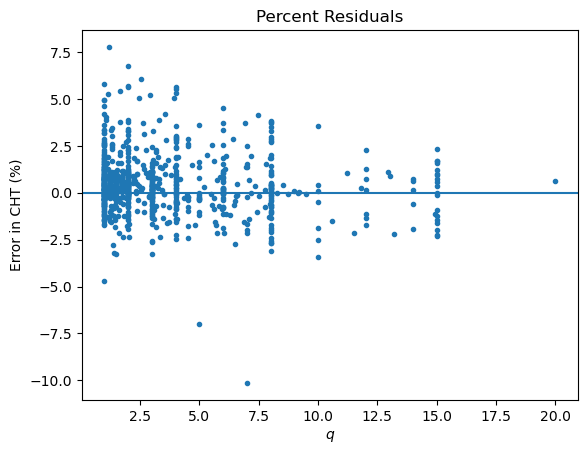

In [42]:

init_param = np.column_stack((ref_orb_period, df_7["reference_mass_ratio"], df_7["reference_dimensionless_spin1_z"], df_7["reference_dimensionless_spin2_z"])) #loading data to train on including spin
Residual_pred = loaded_model.predict(init_param) #Uses fitted model to predict residuals between PN model and actual CHT

fig, ax = plt.subplots()
plt.scatter(df_7["reference_mass_ratio"], 100*(CHT_residual - Residual_pred)/CHT, marker = ".", label = "PySR") #Plots leftover error
plt.axhline(y=0)
plt.xlabel(r"$q$")
plt.ylabel("Error in CHT (%)")
plt.title("Percent Residuals")

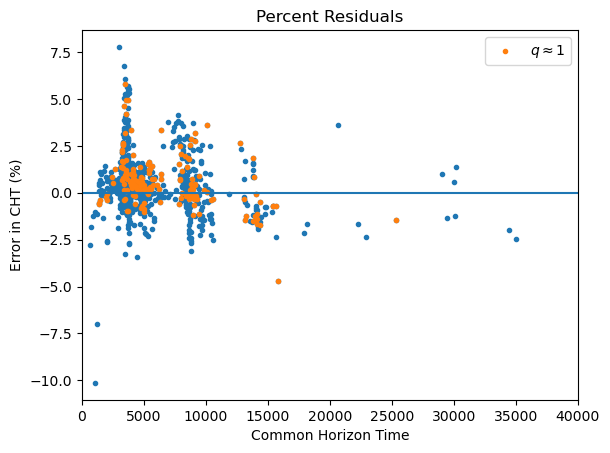

In [55]:
equal_mass_ratio = np.full(len(df_7), r"SXS:BBH:0000")

for i in range(len(df_7)):
    ind = df_7.index[i] #we store the pandas dataframe index rather than a number to be cautious
    if df_7["reference_mass_ratio"][ind] < 1.01: #We define equal mass ratio as not exactly 1 because apparently no simulation has exactly q=1
        if ind[:8] != "SXS:NSNS":
            equal_mass_ratio[i] = ind

equal_mass_ratio = equal_mass_ratio[equal_mass_ratio != r"SXS:BBH:0000"] #We get rid of any essentially empty datapoints
ref_orb_period_q1 = 2*np.pi/df_7["reference_orbital_frequency_mag"][equal_mass_ratio]
init_param_q1 = np.column_stack((ref_orb_period_q1, df_7["reference_mass_ratio"][equal_mass_ratio], df_7["reference_dimensionless_spin1_z"][equal_mass_ratio], df_7["reference_dimensionless_spin2_z"][equal_mass_ratio])) #loading equal mass ratio data to train on including spin for our first model 

with open("spin_model_1.133.pk", 'rb') as file: 
    loaded_model = pickle.load(file)
Residual_pred_q1 = loaded_model.predict(init_param_q1) #predicts the percent residual between PN model and actual simulation for only q=1 simulations

with open("best_model_0.446.pk", 'rb') as file:
    loaded_model = pickle.load(file)
init_param_q1 = np.column_stack((ref_orb_period_q1, df_7["reference_mass_ratio"][equal_mass_ratio])) #q=1 data to be loaded in for our second model
direct_corrections_q1 = loaded_model.predict(init_param_q1) #Predicts PN corrections to Newtonian model for q=1 simulations

corrected_CHT_q1 = Newtonian_CHT([ref_orb_period_q1, df_7["reference_mass_ratio"][equal_mass_ratio]]) - direct_corrections_q1 #Subtracts "post-Newtonian" corrects from the Newtonian predictions for CHT
CHT_q1 = df_7["common_horizon_time"][equal_mass_ratio] - df_7["reference_time"][equal_mass_ratio]

CHT_residual_q1 = corrected_CHT_q1 - CHT_q1

fig, ax = plt.subplots()
plt.scatter(CHT, 100*(CHT_residual - Residual_pred)/CHT, marker = ".") #Plots leftover error
plt.scatter(CHT_q1, 100*(CHT_residual_q1 - Residual_pred_q1)/CHT_q1, marker = ".", label = r"$q \approx 1$") #Plots leftover error
plt.axhline(y=0)
ax.set_xlim(0, 40000)
plt.xlabel("Common Horizon Time")
plt.ylabel("Error in CHT (%)")
plt.title("Percent Residuals")
plt.legend()
#I don't think the spike in error around CHT = 4000 is due to equal mass ratio. Perhaps there are just a lot of simulations at that exact common horizon
#time, so it is just probable to have some simulations with high errors 

Text(0.5, 1.0, 'Percent Residuals')

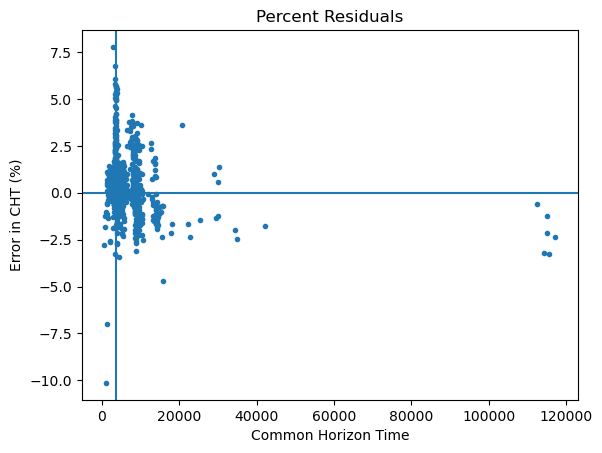

In [66]:
fig, ax = plt.subplots()
plt.scatter(CHT, 100*(CHT_residual - Residual_pred)/CHT, marker = ".", label = "PySR") #Plots leftover error
plt.axhline(y=0)
plt.axvline(x=3700)
plt.xlabel("Common Horizon Time")
plt.ylabel("Error in CHT (%)")
plt.title("Percent Residuals")

Text(0.5, 1.0, 'Percent Residuals')

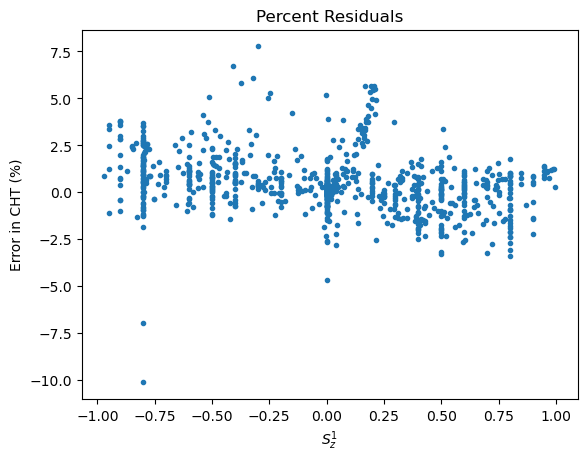

In [34]:
fig, ax = plt.subplots()
plt.scatter(df_7["reference_dimensionless_spin1_z"], 100*(CHT_residual - Residual_pred)/CHT, marker = ".", label = "PySR") #Plots leftover error
plt.xlabel(r"$S_z^1$")
plt.ylabel("Error in CHT (%)")
plt.title("Percent Residuals")

Text(0.5, 1.0, 'Percent Residuals')

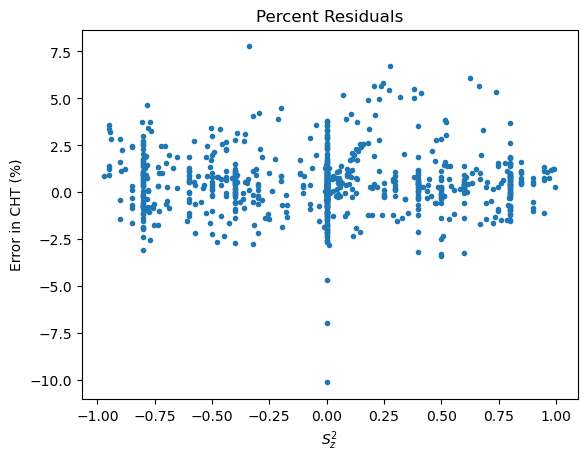

In [35]:
fig, ax = plt.subplots()
plt.scatter(df_7["reference_dimensionless_spin2_z"], 100*(CHT_residual - Residual_pred)/CHT, marker = ".", label = "PySR") #Plots leftover error
plt.xlabel(r"$S_z^2$")
plt.ylabel("Error in CHT (%)")
plt.title("Percent Residuals")

Text(0.5, 1.0, 'Percent Residuals')

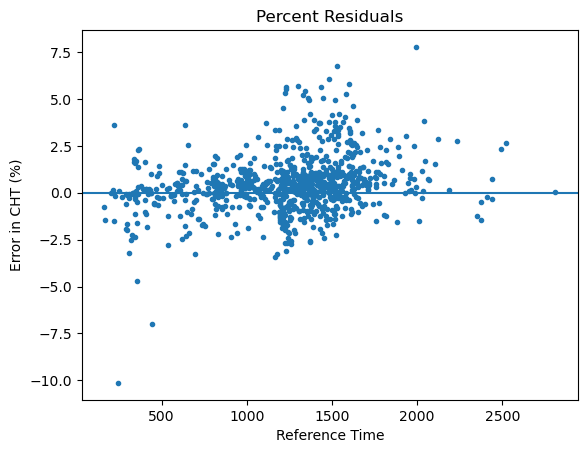

In [36]:
fig, ax = plt.subplots()
plt.scatter(df_7["reference_time"], 100*(CHT_residual - Residual_pred)/CHT, marker = ".", label = "PySR") #Plots leftover error
plt.axhline(y=0)
plt.xlabel("Reference Time")
plt.ylabel("Error in CHT (%)")
plt.title("Percent Residuals")

Text(0.5, 1.0, 'Percent Residuals')

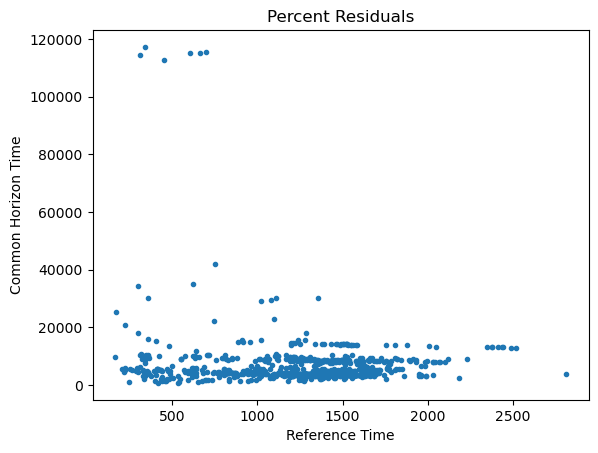

In [68]:
fig, ax = plt.subplots()
plt.scatter(df_7["reference_time"], CHT, marker = ".", label = "PySR") #Plots leftover error
plt.xlabel("Reference Time")
plt.ylabel("Common Horizon Time")
plt.title("Percent Residuals")
#This just seems to demonstrate that there is not much dependence of reference time on common horizon time

In [78]:
i = 0
for value in (CHT_residual - Residual_pred)/CHT:
    if abs(value) < 0.00001:
        j = i
        print(j)
    i += 1
ind = df_7.index[j]
print(ind)

374
SXS:BBH:1906


In [80]:
ID_num = ind[-4:] 
print(ID_num)
event = sxs.load(f"SXS:BBH:{ID_num}", ignore_deprecation=True)
with pd.option_context("max_colwidth", 46, "display.max_rows", None, "display.large_repr", "truncate"):
    display(event.series)

1906


deprecated                                                                      False
reference_mass_ratio                                                         3.999593
reference_chi_eff                                                            0.000083
reference_chi1_perp                                                          0.000001
reference_chi2_perp                                                               0.0
reference_eccentricity                                                       0.000158
reference_eccentricity_bound                                                 0.000158
reference_time                                                                  876.5
reference_dimensionless_spin1_x                                             -0.000001
reference_dimensionless_spin1_y                                                  -0.0
reference_dimensionless_spin1_z                                              0.000121
reference_dimensionless_spin1_mag                     

In [74]:
ID_num = ind[-3:] #Will have to change to -4 if ID_num doesn't have a leading 0
print(ID_num)
event = sxs.load(f"SXS:BBH:0{ID_num}", ignore_deprecation=True) #Will have to change if ID_num does not have a leading 0
with pd.option_context("max_colwidth", 46, "display.max_rows", None, "display.large_repr", "truncate"):
    display(event.series)

621


deprecated                                                                      False
reference_mass_ratio                                                          7.00015
reference_chi_eff                                                           -0.699805
reference_chi1_perp                                                               0.0
reference_chi2_perp                                                               0.0
reference_eccentricity                                                       0.003079
reference_eccentricity_bound                                                 0.003079
reference_time                                                                  244.0
reference_dimensionless_spin1_x                                                  -0.0
reference_dimensionless_spin1_y                                                   0.0
reference_dimensionless_spin1_z                                             -0.799772
reference_dimensionless_spin1_mag                     

Text(0.5, 1.0, 'Percent Residuals')

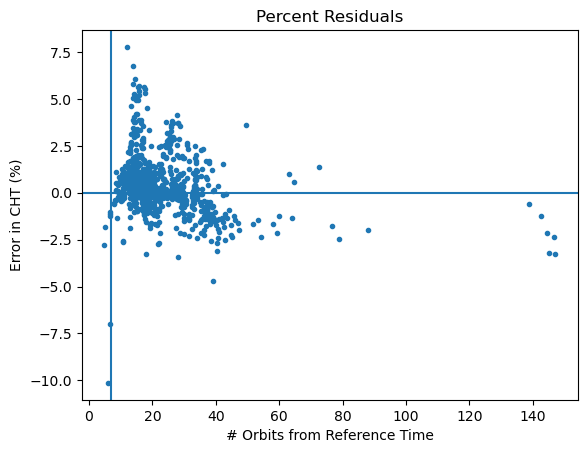

In [85]:
fig, ax = plt.subplots()
plt.scatter(df_7["number_of_orbits_from_reference_time"], 100*(CHT_residual - Residual_pred)/CHT, marker = ".", label = "PySR") #Plots leftover error
plt.axhline(y=0)
plt.axvline(x = 7)
plt.xlabel("# Orbits from Reference Time")
plt.ylabel("Error in CHT (%)")
plt.title("Percent Residuals")

Text(0.5, 1.0, 'Percent Residuals')

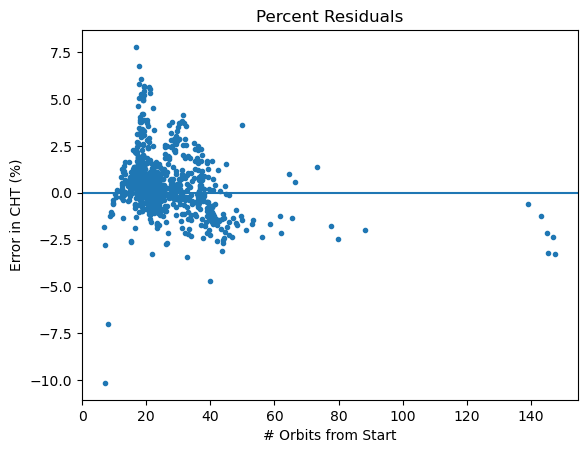

In [83]:
fig, ax = plt.subplots()
plt.scatter(df_7["number_of_orbits_from_start"], 100*(CHT_residual - Residual_pred)/CHT, marker = ".", label = "PySR") #Plots leftover error
plt.axhline(y=0)
plt.xlabel("# Orbits from Start")
plt.ylabel("Error in CHT (%)")
plt.title("Percent Residuals")

In [ ]:
df_8 = df_7.loc[df_7["number_of_orbits_from_reference_time"] > 7]

ref_orb_period_8 = 2*np.pi/df_*["reference_orbital_frequency_mag"]
CHT _8 = df_8["common_horizon_time"] - df_8["reference_time"]

with open("spin_model_1.133.pk", 'rb') as file: #Open the saved model file and store that data under the name 'file'
    loaded_model = pickle.load(file) #Use Pickle module to load data into usable format and put that into loaded_model variable
init_param = np.column_stack((ref_orb_period_8, df_8["reference_mass_ratio"], df_8["reference_dimensionless_spin1_z"], df_8["reference_dimensionless_spin2_z"])) 

In [ ]:
loaded_model.warm_start=True

    model.fit(init_param, CHT_residual, weights = CHT_8) #Fits the orbital period, mass ratio, and spin data to the residuals found between the simulation CHT and the CHT predicted by my corrected Newtonian model
    Residual_pred = model.predict(init_param) #Uses fitted model to predict residuals between PN model and actual CHT
    current_avg_error = 100*np.sqrt(np.power((CHT_residual - Residual_pred)/CHT, 2)).mean() #Defines leftover error after removing the model's prediction for residual from PN model
    
    print("Current Prediction Average Error (%):", current_avg_error)
    print("Best Prediction Average Error (%):", best_avg_error)
    print("Current Model Formula:", model.sympy())
    plt.scatter(df_7["reference_mass_ratio"], 100*(CHT_residual - Residual_pred)/CHT, marker = ".", label = "PySR") #Plots leftover error
    plt.xlabel("q")
    plt.ylabel("Error in CHT (%)")
    plt.title("Percent Residuals")

    if current_avg_error < best_avg_error:
        best_avg_error = current_avg_error
        plt.savefig(f"spin_model_{round(best_avg_error, 3)}.png")
        with open(f'spin_model_{round(best_avg_error, 3)}.pk', 'wb') as best_model_file: #We create a pickle file called 'best_model.pk' that we want to write into and call it best_model_file
            pickle.dump(model, best_model_file) #We write the current state of the model to the pickle file created above
    elif current_avg_error < 1.5*best_avg_error:
        plt.savefig(f"spin_model_{round(current_avg_error, 3)}.png")
        with open(f'spin_model_{round(current_avg_error, 3)}.pk', 'wb') as good_model_file:
            pickle.dump(model, good_model_file)

    plt.close()